### $\epsilon$ をつけたほう

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import backward as bk
import forward as fw
import math

In [2]:
def backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right):
    pi = ((((p*(u-1))/((1-p)*(1-d)))**theta)-1)/((u - 1)+(((p*(u-1))/((1-p)*(1-d)))**theta)*(1 - d))
    up_times = bk.up_times(N)
    down_times = bk.down_times(N)
    prm_theta = bk.prm_theta(N, theta)
    
    up_r = bk.up_r(N, u)
    up_r_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, bk.uniform_rand(N, seed, eps_left, eps_right)))

    
    down_r = bk.down_r(N, d)
    down_r_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, bk.uniform_rand(N, seed, eps_left, eps_right)))
    
    prob = bk.prob(N, p)
    prm_M = bk.prm_M(N, pi, prm_theta, up_r_uniform_rand, down_r_uniform_rand, prob)
    value = bk.value(N, pi, default_value, up_r_uniform_rand, down_r_uniform_rand)
    wealth = bk.wealth(N, prm_theta, prm_M, value)
    utility = bk.utility(N, prm_theta, value)
    exp_utility = bk.exp_utility(N, up_times, down_times, prob, utility)
    Wn = bk.Wn(N, up_times, down_times, prob, wealth)
    
    df_backward = pd.DataFrame([up_times, down_times, prm_theta, up_r_uniform_rand, down_r_uniform_rand, prob, prm_M, value, wealth, utility, exp_utility, Wn]).T
    df_backward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_M', 'value', 'wealth', 'utility', 'exp_utility', 'Wn']
    
    return df_backward#df_backward['exp_utility'][N], df_backward['wealth'][0] 

In [3]:
def backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma):
    pi = ((((p*(u-1))/((1-p)*(1-d)))**theta)-1)/((u - 1)+(((p*(u-1))/((1-p)*(1-d)))**theta)*(1 - d))
    up_times = bk.up_times(N)
    down_times = bk.down_times(N)
    prm_theta = bk.prm_theta(N, theta)
    
    up_r = bk.up_r(N, u)
    up_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, bk.norm_rand(N, seed, mu, sigma)))
    
    down_r = bk.down_r(N, d)
    down_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, bk.norm_rand(N, seed, mu, sigma)))
    
    prob = bk.prob(N, p)
    prm_M = bk.prm_M(N, pi, prm_theta, up_r_norm_rand, down_r_norm_rand, prob)
    value = bk.value(N, pi, default_value, up_r_norm_rand, down_r_norm_rand)
    wealth = bk.wealth(N, prm_theta, prm_M, value)
    utility = bk.utility(N, prm_theta, value)
    exp_utility = bk.exp_utility(N, up_times, down_times, prob, utility)
    Wn = bk.Wn(N, up_times, down_times, prob, wealth)
    
    df_backward = pd.DataFrame([up_times, down_times, prm_theta, up_r_norm_rand, down_r_norm_rand, prob, prm_M, value, wealth, utility, exp_utility, Wn]).T
    df_backward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_M', 'value', 'wealth', 'utility', 'exp_utility', 'Wn']
    
    return df_backward#df_backward['exp_utility'][N], df_backward['wealth'][0] 

In [4]:
def forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right):
    up_times = fw.up_times(N)
    down_times = fw.down_times(N)
    prm_theta = fw.prm_theta(N, theta)
    
    up_r = fw.up_r(N, u)
    up_r_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, fw.uniform_rand(N, seed, eps_left, eps_right)))
    
    down_r = fw.down_r(N, d)
    down_r_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, fw.uniform_rand(N, seed, eps_left, eps_right)))
    
    prob = fw.prob(N, p)
    prm_q = fw.prm_q(N, up_r_uniform_rand, down_r_uniform_rand)
    prm_a = fw.prm_a(N, prob, prm_q)
    prm_b = fw.prm_b(N, prm_q)
    prm_c = fw.prm_c(N, prob, prm_q)
    delta = fw.delta(N, prm_theta, prm_a, prm_b, prm_c)
    pi = fw.pi(N, prm_theta, up_r_uniform_rand, prob, prm_q, delta)
    value = fw.value(N, default_value, up_r_uniform_rand, down_r_uniform_rand, pi)
    U0 = fw.U0(N, prm_theta, value)
    I0 = fw.I0(N, prm_theta, value)
    I1 = fw.I1(N, delta, I0)
    U1 = fw.U1(N, prm_theta, delta, U0)
    exp_U1 = fw.exp_U1(N, up_times, down_times, prob, U1)
    
    df_forward = pd.DataFrame([up_times, down_times, prm_theta, up_r_uniform_rand, down_r_uniform_rand, prob, prm_q, prm_a, prm_b, prm_c, delta, pi, value, U0, I0, I1, U1, exp_U1]).T
    df_forward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_q', 'prm_a', 'prm_b', 'prm_c', 'delta', 'pi', 'value', 'U0', 'I0', 'I1', 'U1', 'exp_U1']
    
    return df_forward#df_forward["exp_U1"][N]

In [5]:
def forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma):
    up_times = fw.up_times(N)
    down_times = fw.down_times(N)
    prm_theta = fw.prm_theta(N, theta)
    
    up_r = fw.up_r(N, u)
    up_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, fw.norm_rand(N, seed, mu, sigma)))
    
    down_r = fw.down_r(N, d)
    down_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, fw.norm_rand(N, seed, mu, sigma)))
    
    prob = fw.prob(N, p)
    prm_q = fw.prm_q(N, up_r_norm_rand, down_r_norm_rand)
    prm_a = fw.prm_a(N, prob, prm_q)
    prm_b = fw.prm_b(N, prm_q)
    prm_c = fw.prm_c(N, prob, prm_q)
    delta = fw.delta(N, prm_theta, prm_a, prm_b, prm_c)
    pi = fw.pi(N, prm_theta, up_r_norm_rand, prob, prm_q, delta)
    value = fw.value(N, default_value, up_r_norm_rand, down_r_norm_rand, pi)
    U0 = fw.U0(N, prm_theta, value)
    I0 = fw.I0(N, prm_theta, value)
    I1 = fw.I1(N, delta, I0)
    U1 = fw.U1(N, prm_theta, delta, U0)
    exp_U1 = fw.exp_U1(N, up_times, down_times, prob, U1)
    
    df_forward = pd.DataFrame([up_times, down_times, prm_theta, up_r_norm_rand, down_r_norm_rand, prob, prm_q, prm_a, prm_b, prm_c, delta, pi, value, U0, I0, I1, U1, exp_U1]).T
    df_forward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_q', 'prm_a', 'prm_b', 'prm_c', 'delta', 'pi', 'value', 'U0', 'I0', 'I1', 'U1', 'exp_U1']
    
    return df_forward#df_forward["exp_U1"][N]

In [7]:
def default_plot_uniform(N, theta, u, d, p, default_value, eps_left, eps_right):
    default_arr = []
    
    for i in range(1, 11):
        default_arr.append(500*i)
        forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: sum(forward_uniform_rand(N, theta, u, d, p, x, eps_left, eps_right)["exp_U1"][N]), default_arr))]

    fw = pd.DataFrame(forward_type).T
    fw.columns = ["default", "Exp_u1"]

    fw_x = fw["default"]
    fw_y = fw["Exp_u1"]

    for i in range(1, 11):
        backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: sum(backward_uniform_rand(N, theta, u, d, p, x, eps_left, eps_right)["exp_utility"][N]), default_arr))]

    bk = pd.DataFrame(backward_type).T
    bk.columns = ["default", "Exp_u1"]

    bk_x = bk["default"]
    bk_y = bk["Exp_u1"]
    
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(20,10))
    plt.plot(fw_x, fw_y, label = "forward")
    plt.plot(bk_x, bk_y, label = "backward")

    plt.title(r"$\theta =$" +str(theta), fontsize=32)
    plt.xlabel(r"$x_0$", fontsize=32)
    plt.ylabel(r"$E[u(V_T^*)]$", fontsize=32)

    plt.tick_params(labelsize=24)
    plt.legend(fontsize=32)
    return plt.show()

In [36]:
def default_plot_normal(N, theta, u, d, p, default_value, mu, sigma):
    default_arr = []
    
    for i in range(1, 11):
        default_arr.append(500*i)
        forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: sum(forward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_U1"][N]), default_arr))]

    fw = pd.DataFrame(forward_type).T
    fw.columns = ["default", "Exp_u1"]

    fw_x = fw["default"]
    fw_y = fw["Exp_u1"]

    for i in range(1, 11):
        backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: sum(backward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_utility"][N]), default_arr))]

    bk = pd.DataFrame(backward_type).T
    bk.columns = ["default", "Exp_u1"]

    bk_x = bk["default"]
    bk_y = bk["Exp_u1"]
    
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(20,10))
    plt.plot(fw_x, fw_y, label = "forward")
    plt.plot(bk_x, bk_y, label = "backward")

    plt.title(r"$\theta =$" +str(theta)+r"$, s =$" +str(sigma), fontsize=32)
    plt.xlabel(r"$x_0$", fontsize=32)
    plt.ylabel(r"$E[u(V_T^*)]$", fontsize=32)

    plt.tick_params(labelsize=24)
    plt.legend(fontsize=32)
    return plt.show()

In [9]:
def default_plot_y_uniform(N, theta, u, d, p, default_value, eps_left, eps_right):
    default_arr = []

    for i in range(1, 11):
        default_arr.append(500*i)
        forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: math.pow(sum(forward_uniform_rand(N, theta, u, d, p, x, eps_left, eps_right)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))), default_arr))]

    fw = pd.DataFrame(forward_type).T
    fw.columns = ["default", "Exp_u1"]

    fw_x = fw["default"]
    fw_y = fw["Exp_u1"]

    for i in range(1, 11):
        backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: math.pow(sum(backward_uniform_rand(N, theta, u, d, p, x, eps_left, eps_right)["exp_utility"][N])*(1-1/theta), 1/(1-(1/theta))), default_arr))]

    bk = pd.DataFrame(backward_type).T
    bk.columns = ["default", "Exp_u1"]

    bk_x = bk["default"]
    bk_y = bk["Exp_u1"]

    plt.figure(figsize=(20,10))
    plt.plot(fw_x, fw_y, label = "forward")
    plt.plot(bk_x, bk_y, label = "backward")

    plt.title(r"$\theta =$" +str(theta), fontsize=32)
    plt.xlabel(r"$x_0$", fontsize=32)
    plt.ylabel(r"$y$", fontsize=32)
    
    plt.tick_params(labelsize=24)
    plt.legend(fontsize=32)
    return plt.show()

In [37]:
def default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma):
    default_arr = []

    for i in range(1, 11):
        default_arr.append(500*i)
        forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: math.pow(sum(forward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))), default_arr))]

    fw = pd.DataFrame(forward_type).T
    fw.columns = ["default", "Exp_u1"]

    fw_x = fw["default"]
    fw_y = fw["Exp_u1"]

    for i in range(1, 11):
        backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: math.pow(sum(backward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_utility"][N])*(1-1/theta), 1/(1-(1/theta))), default_arr))]

    bk = pd.DataFrame(backward_type).T
    bk.columns = ["default", "Exp_u1"]

    bk_x = bk["default"]
    bk_y = bk["Exp_u1"]

    plt.figure(figsize=(20,10))
    plt.plot(fw_x, fw_y, label = "forward")
    plt.plot(bk_x, bk_y, label = "backward")

    plt.title(r"$\theta =$" +str(theta)+r"$, s =$" +str(sigma), fontsize=32)
    plt.xlabel(r"$x_0$", fontsize=32)
    plt.ylabel(r"$y$", fontsize=32)
    
    plt.tick_params(labelsize=24)
    plt.legend(fontsize=32)
    return plt.show()

## 一様乱数　[-0.01, 0.01]

In [66]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
eps_left = -0.01
eps_right = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

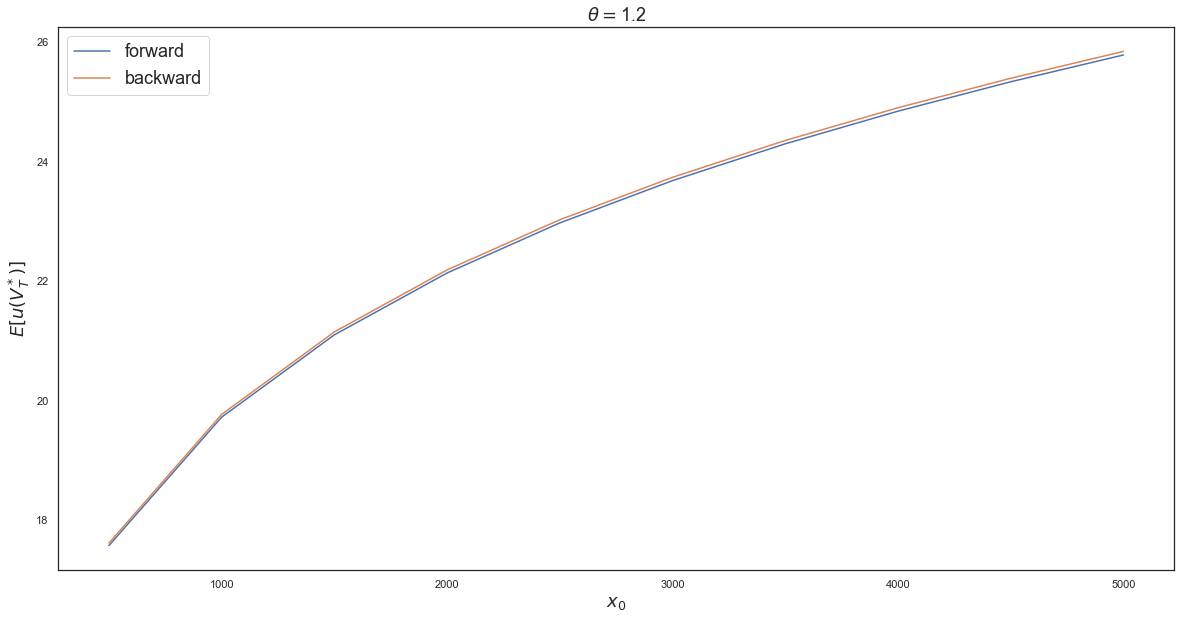

In [67]:
default_plot_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

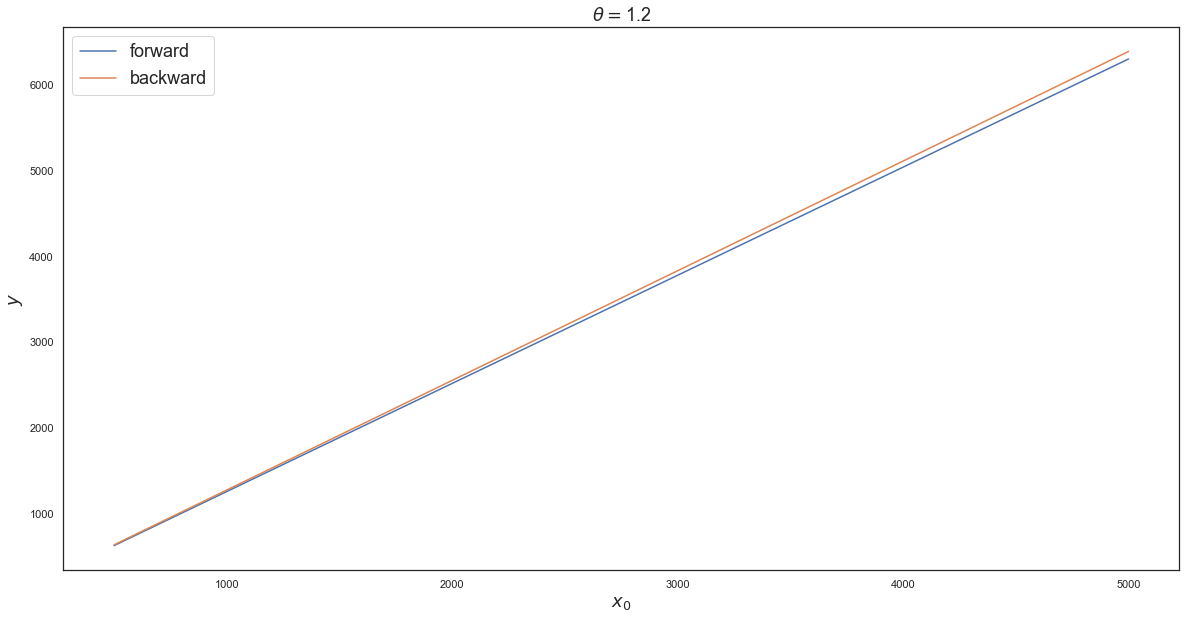

In [68]:
default_plot_y_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

In [69]:
seed = 12345
N = 10
theta = 2.0
u = 1.2
d = 0.8
p = 0.4
default_value = 500
eps_left = -0.01
eps_right = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

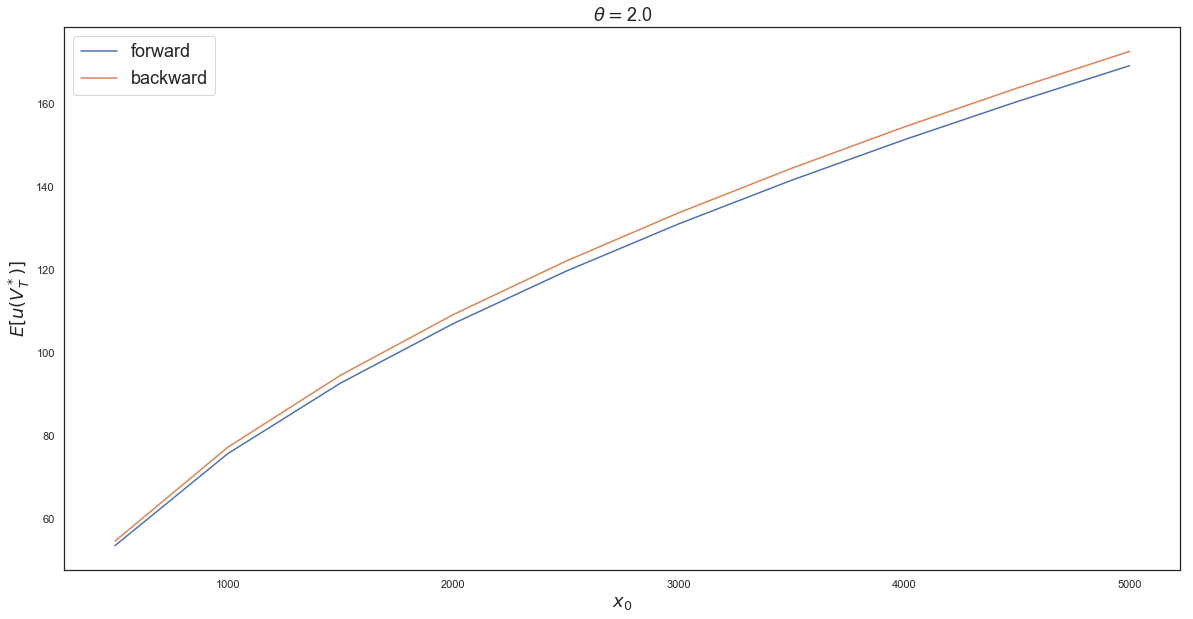

In [70]:
default_plot_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

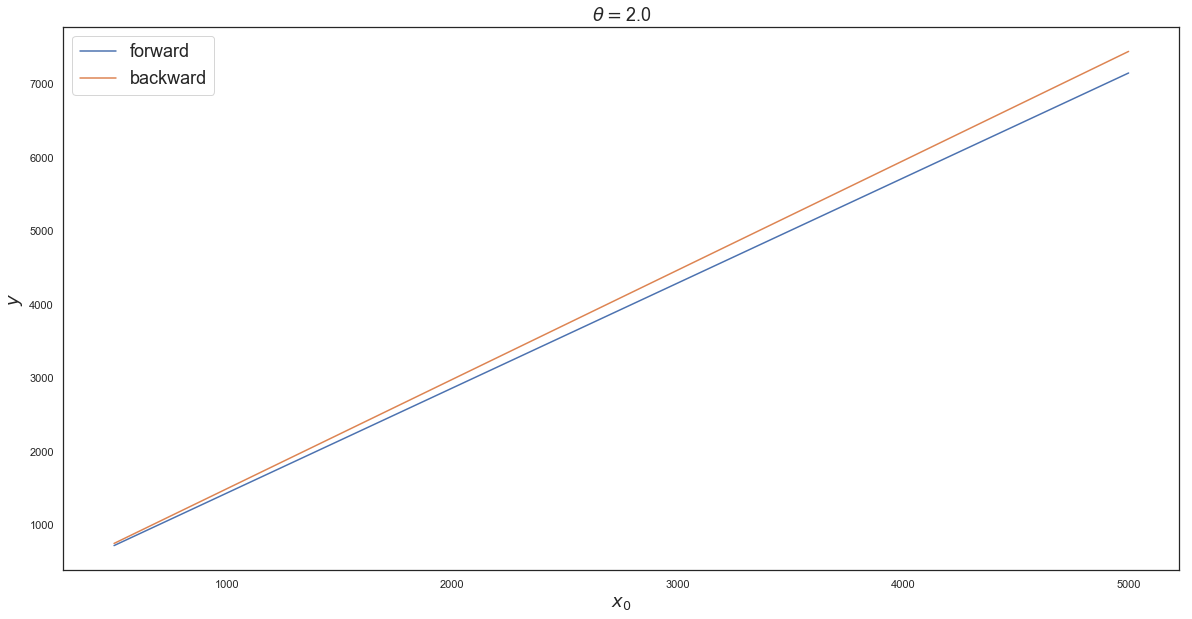

In [71]:
default_plot_y_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

In [72]:
seed = 12345
N = 10
theta = 3.0
u = 1.2
d = 0.8
p = 0.4
default_value = 500
eps_left = -0.01
eps_right = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

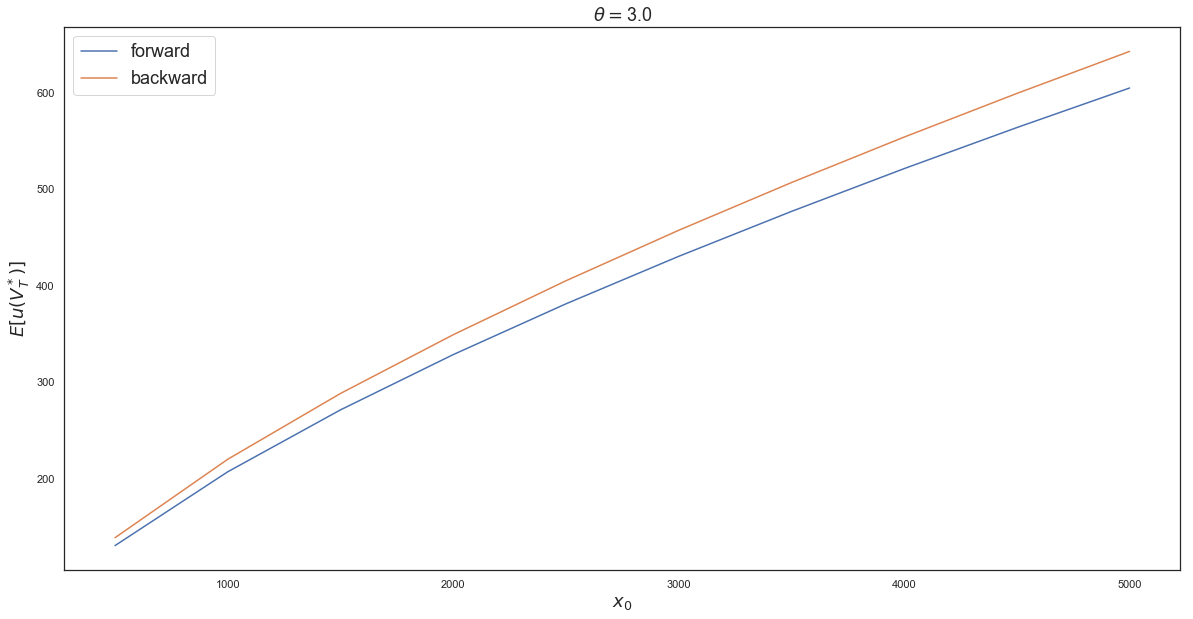

In [73]:
default_plot_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

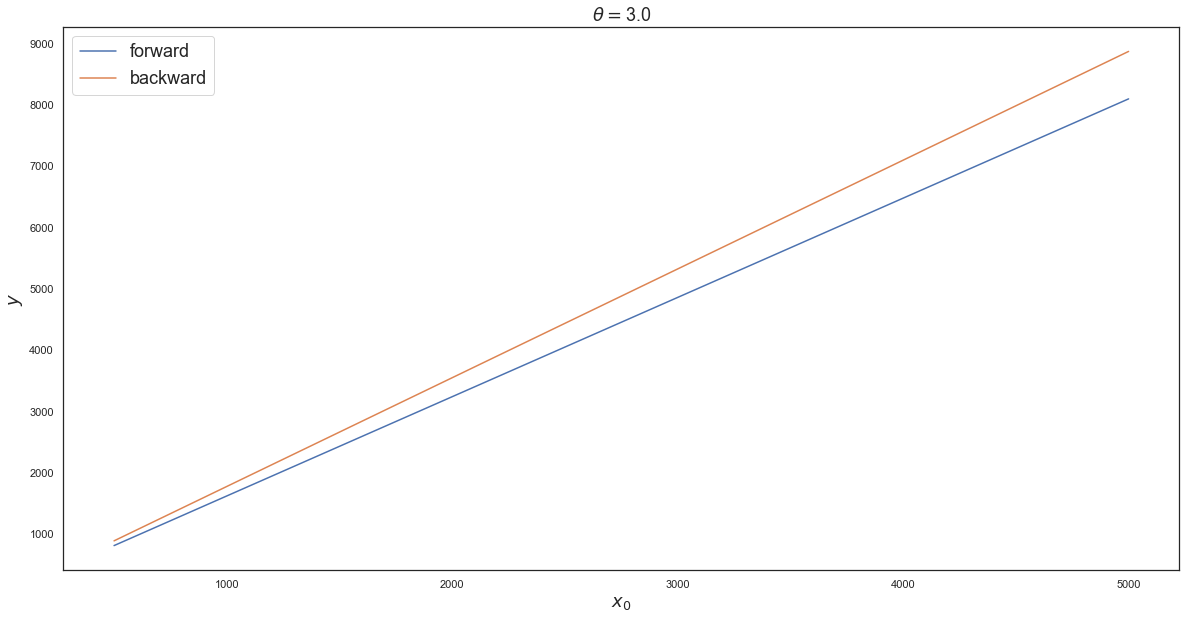

In [74]:
default_plot_y_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

## 一様乱数　[-0.05, 0.05]

In [75]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
eps_left = -0.05
eps_right = 0.05

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

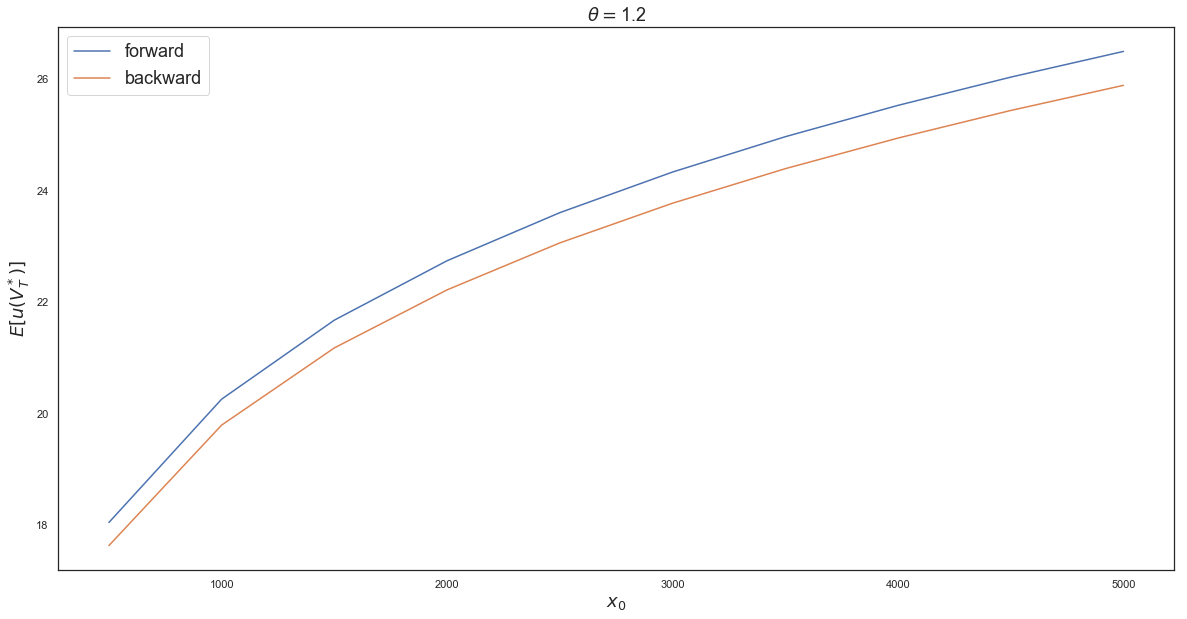

In [76]:
default_plot_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

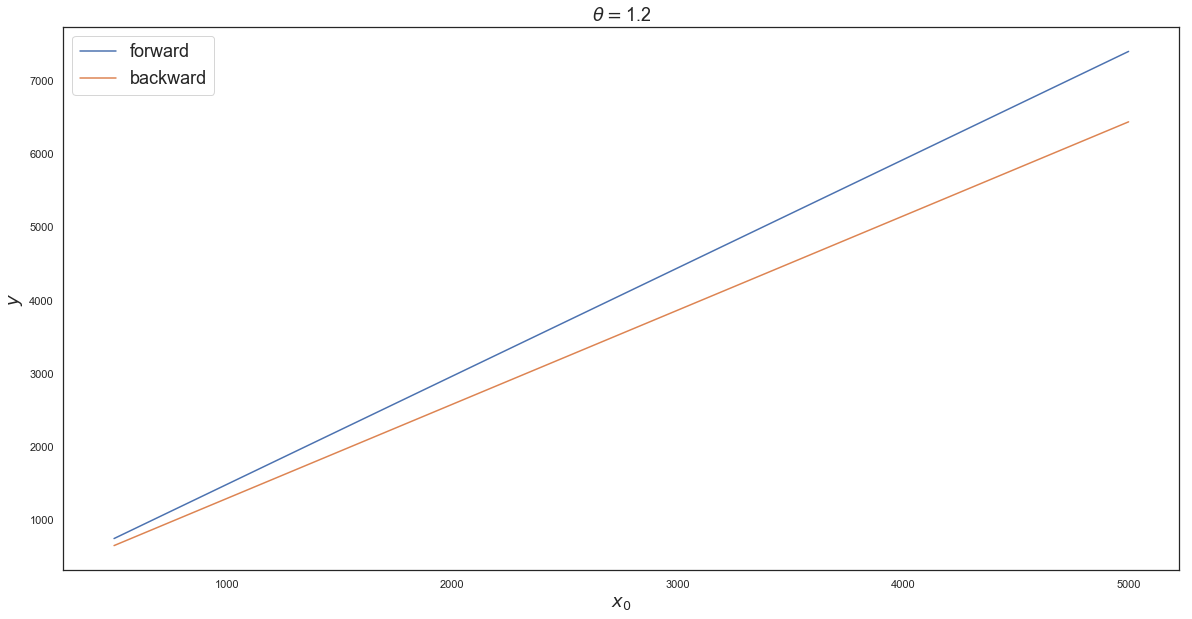

In [77]:
default_plot_y_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

In [78]:
seed = 12345
N = 10
theta = 2.0
u = 1.2
d = 0.8
p = 0.4
default_value = 500
eps_left = -0.05
eps_right = 0.05

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

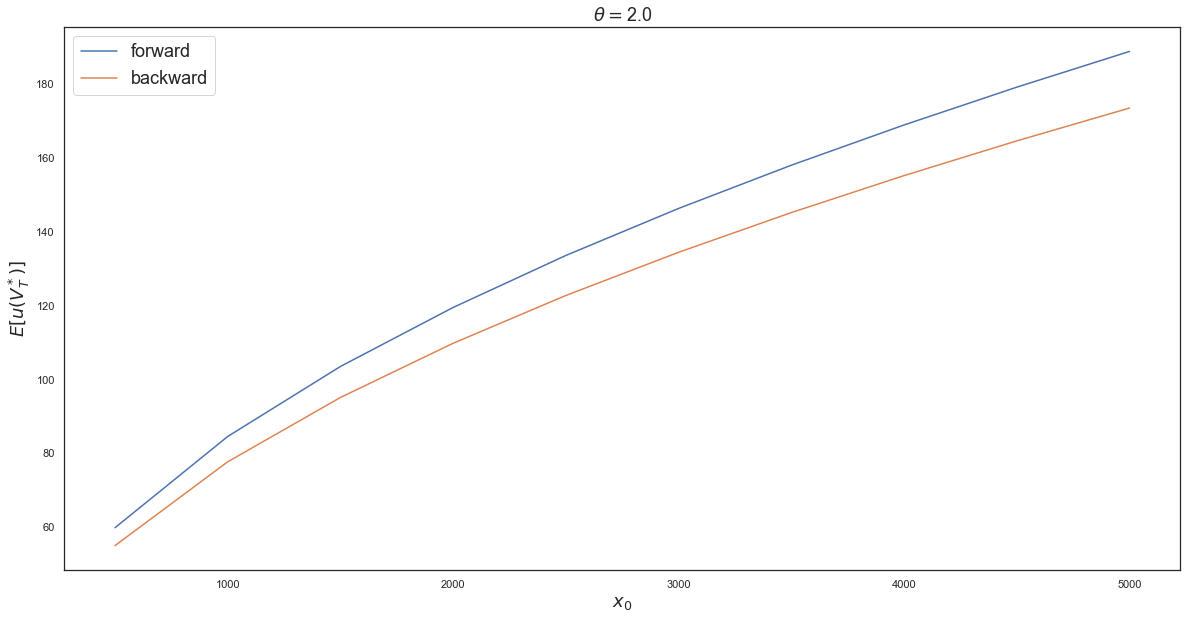

In [79]:
default_plot_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

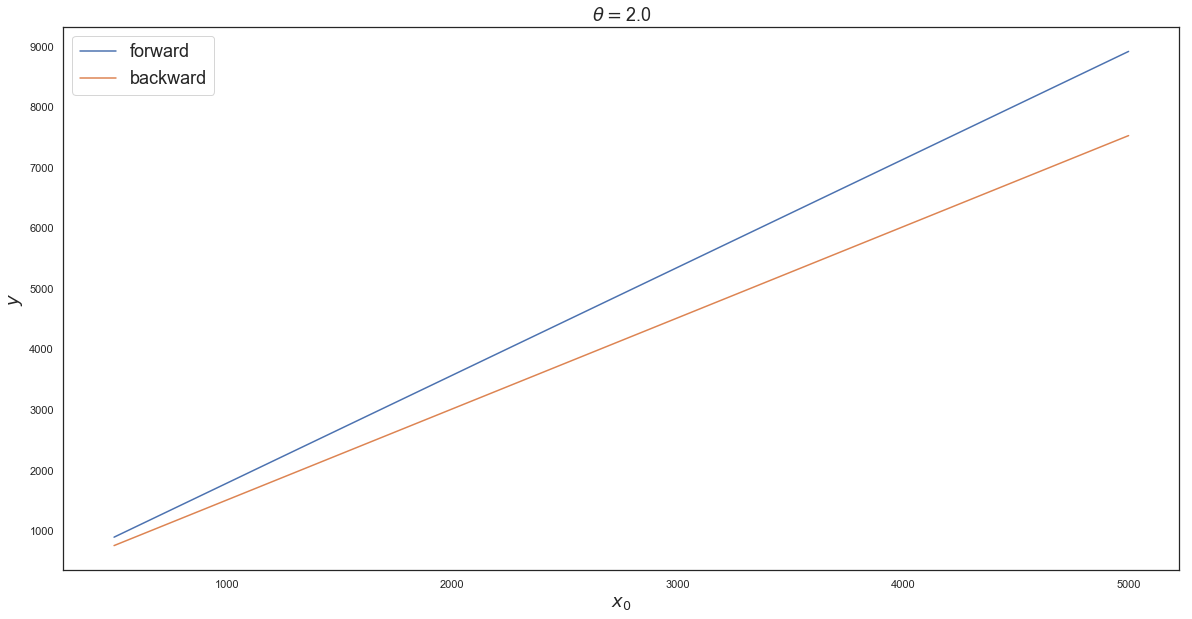

In [80]:
default_plot_y_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

In [81]:
seed = 12345
N = 10
theta = 3.0
u = 1.2
d = 0.8
p = 0.4
default_value = 500
eps_left = -0.05
eps_right = 0.05

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

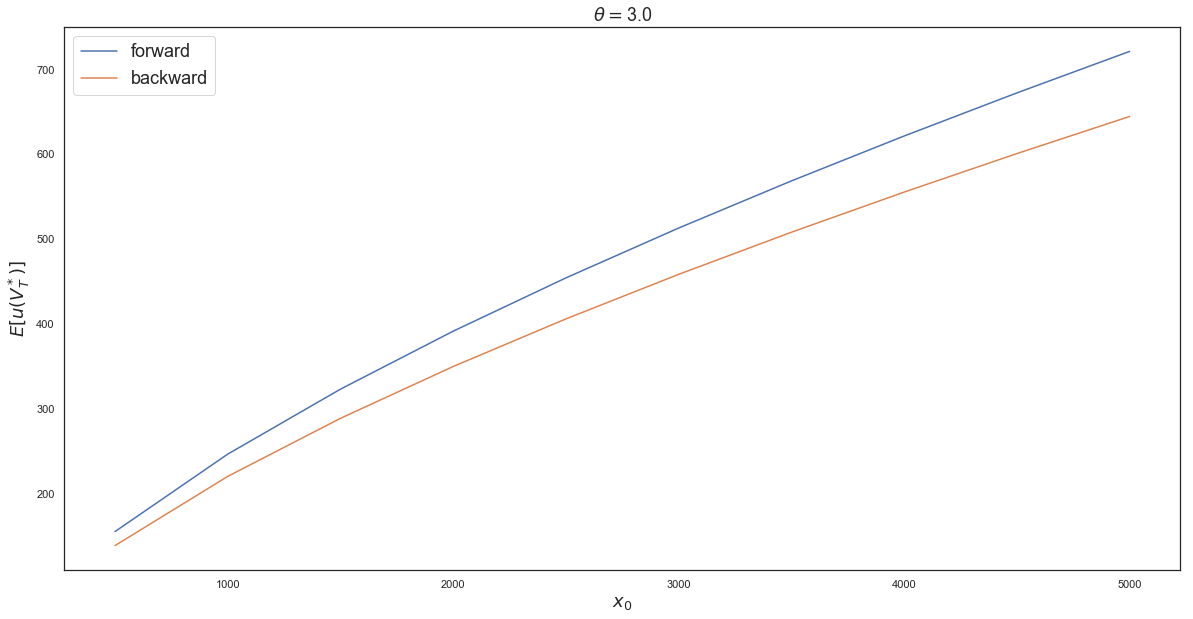

In [82]:
default_plot_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

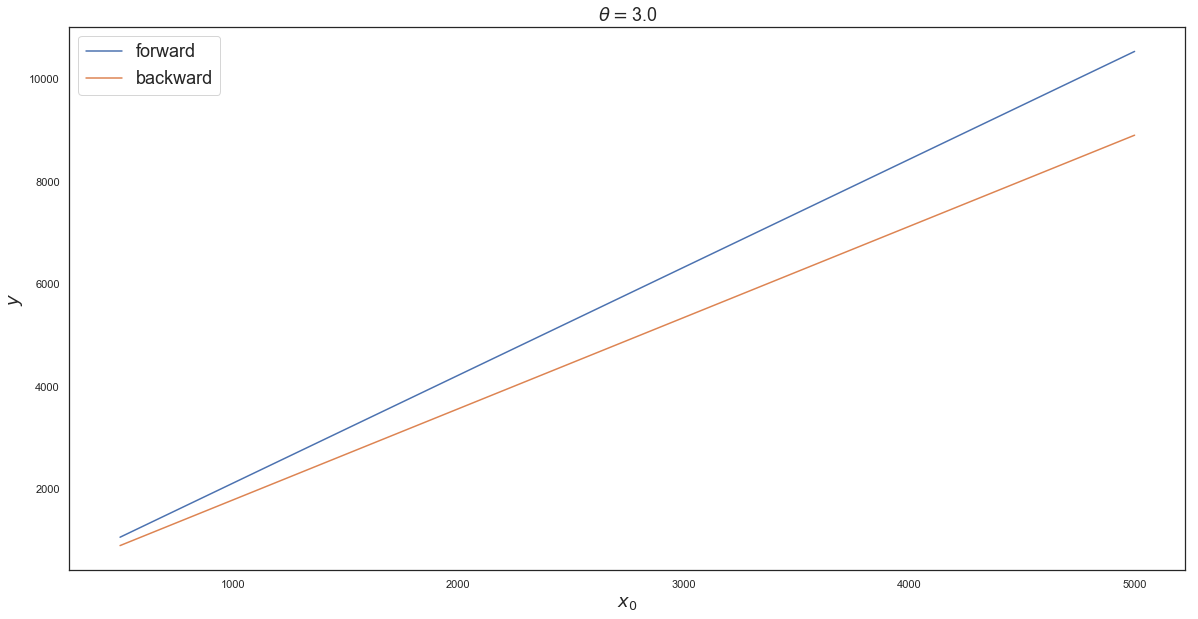

In [83]:
default_plot_y_uniform(N, theta, u, d, p, default_value, eps_left, eps_right)

### 正規乱数（$\mu=0$で$\sigma$をいろいろ変えてやってみる）

In [38]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

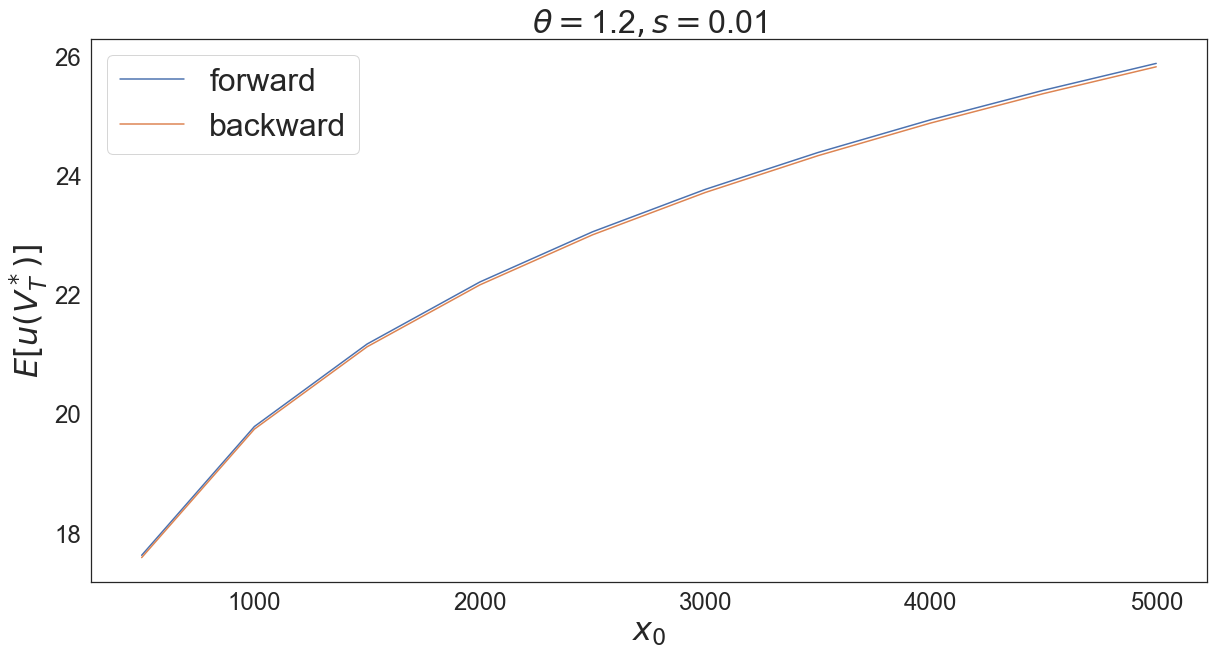

In [39]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

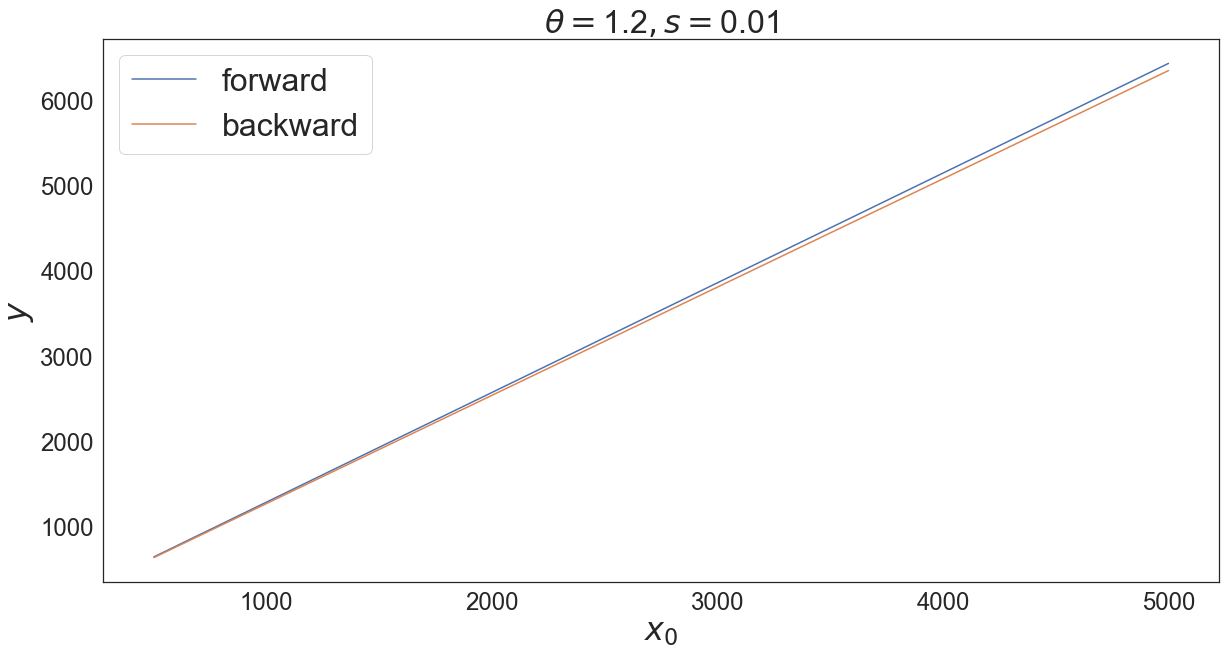

In [40]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [41]:
seed = 12345
N = 10
theta = 2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

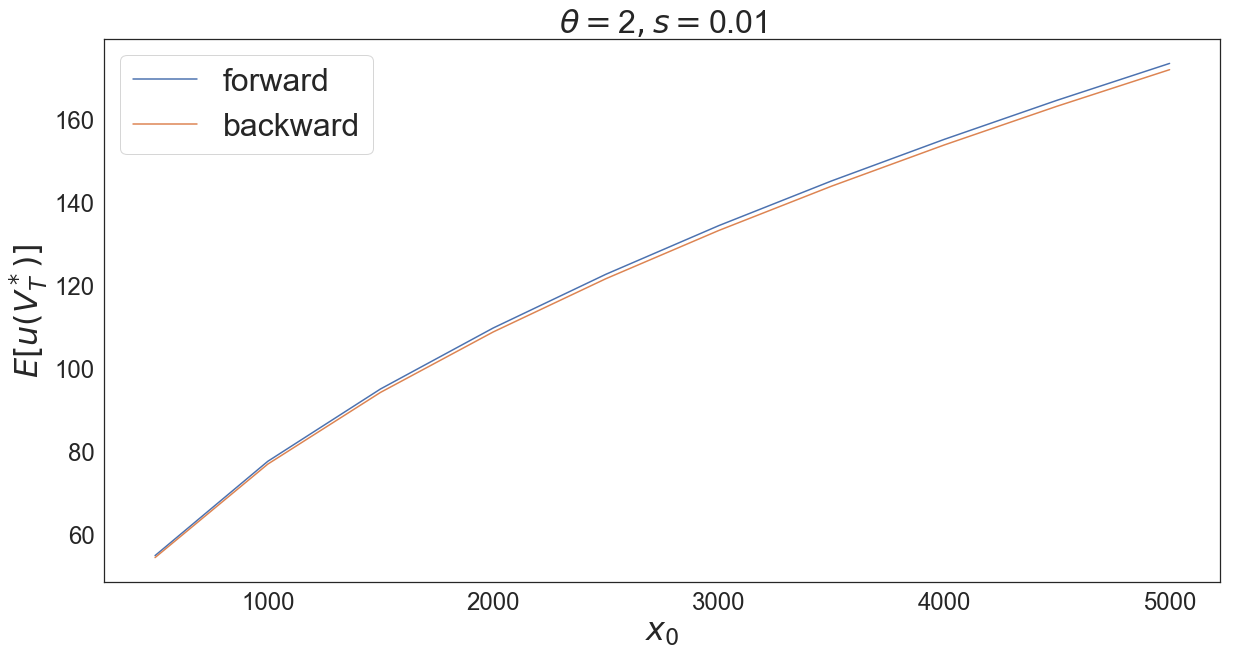

In [42]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

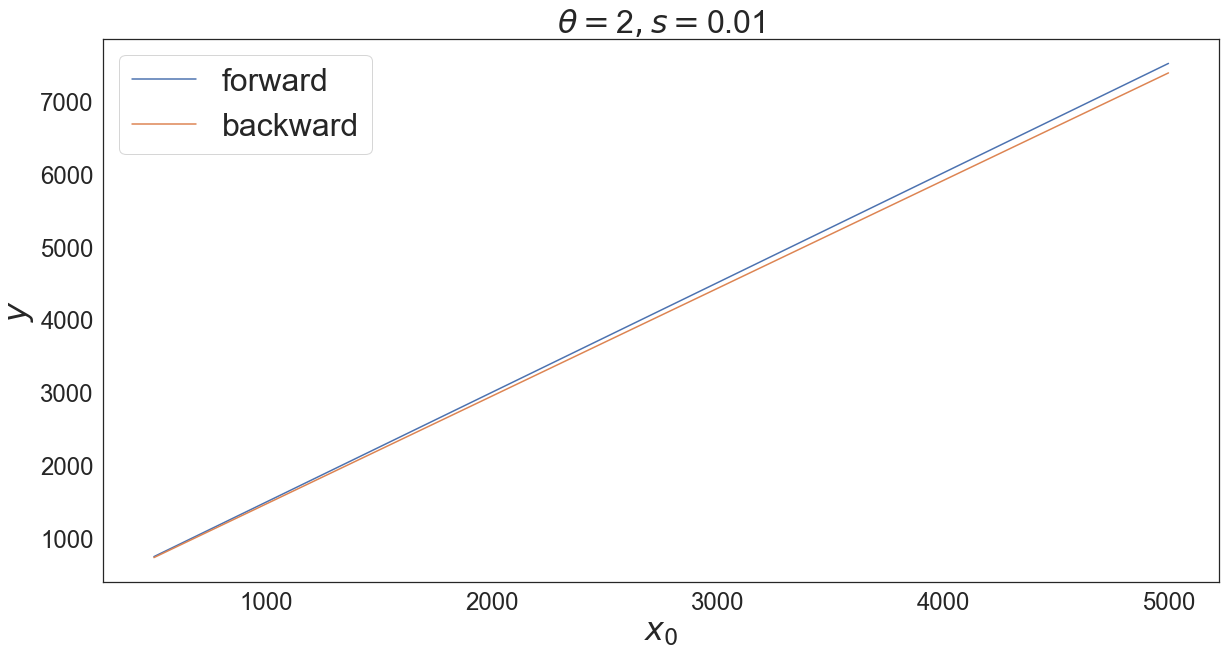

In [43]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [44]:
seed = 12345
N = 10
theta = 3
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

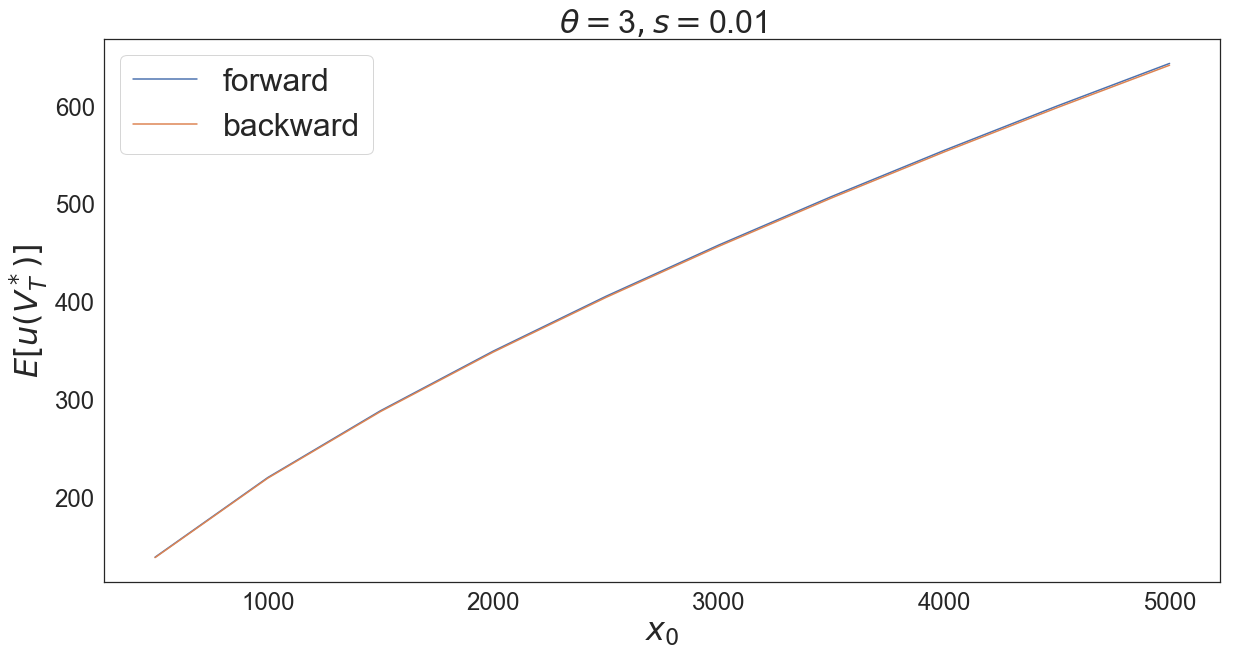

In [45]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

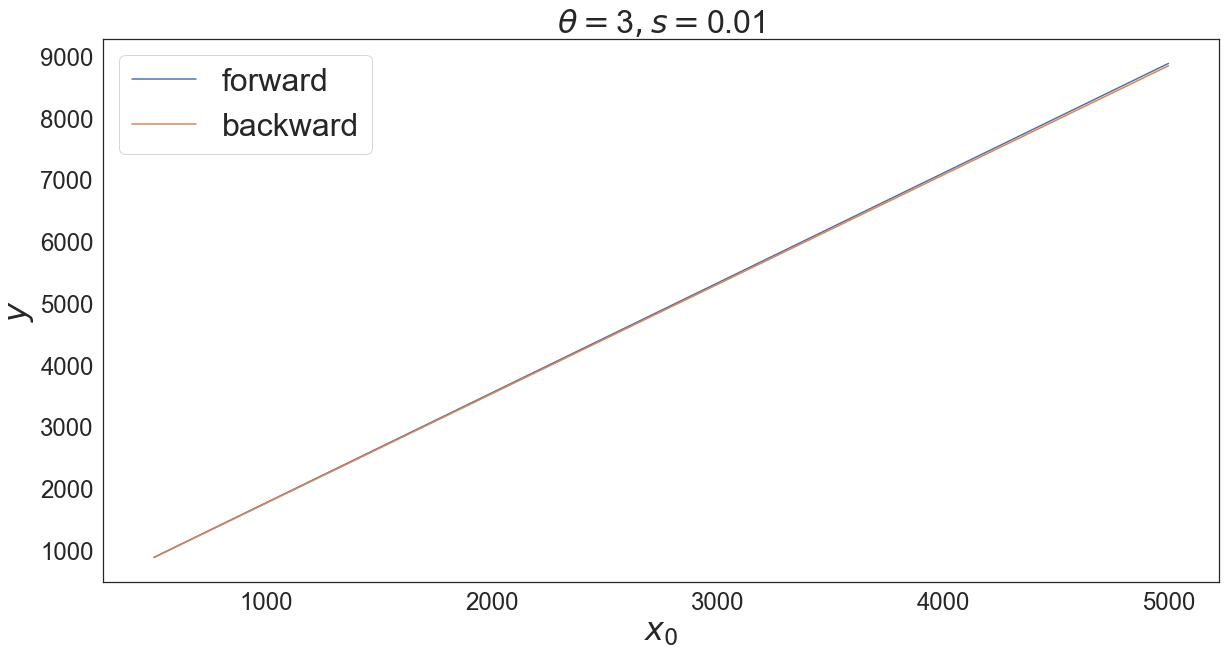

In [46]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [47]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.02

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

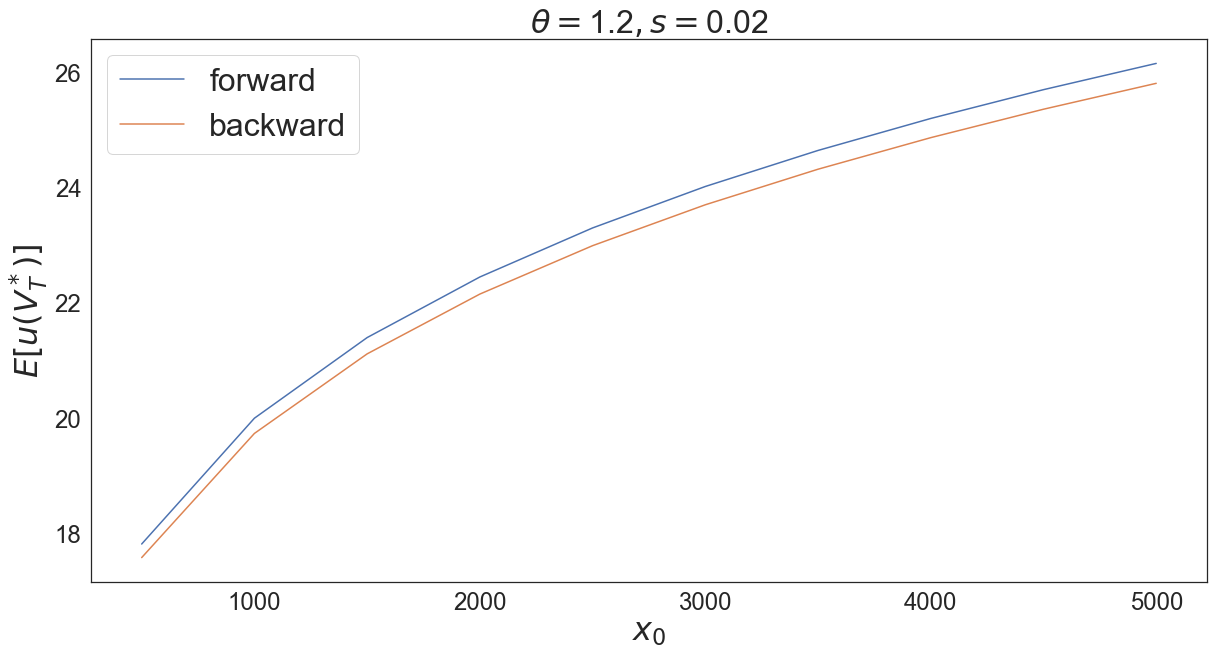

In [48]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

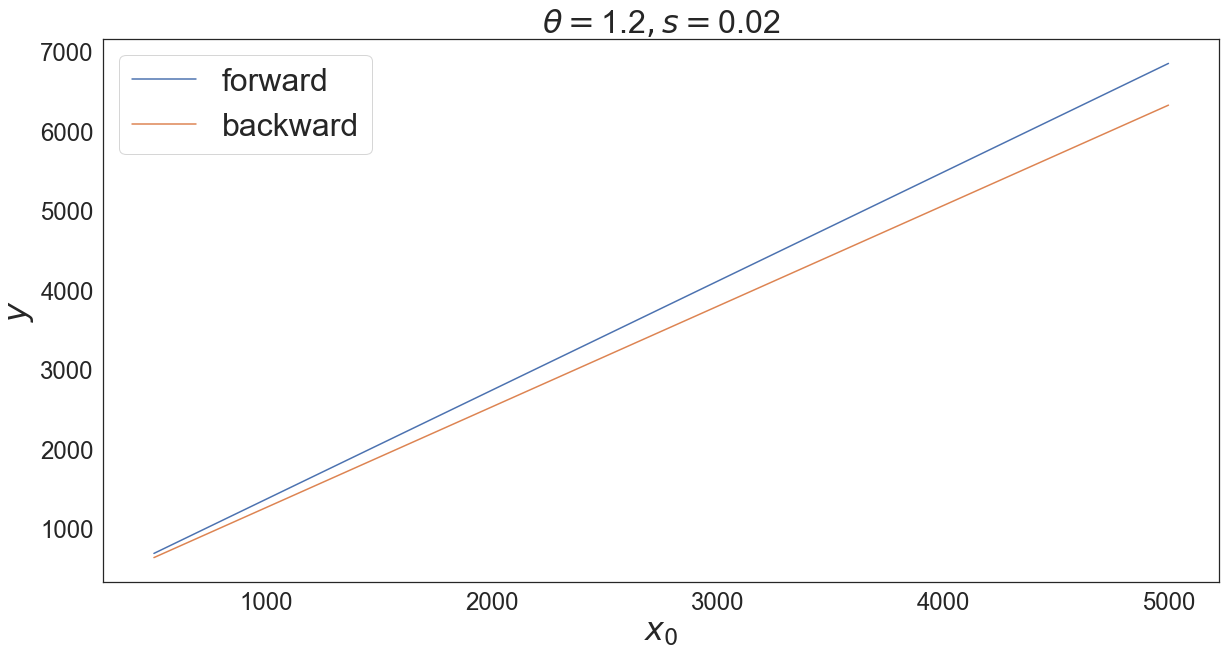

In [49]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [50]:
seed = 12345
N = 10
theta = 2.0
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.02

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

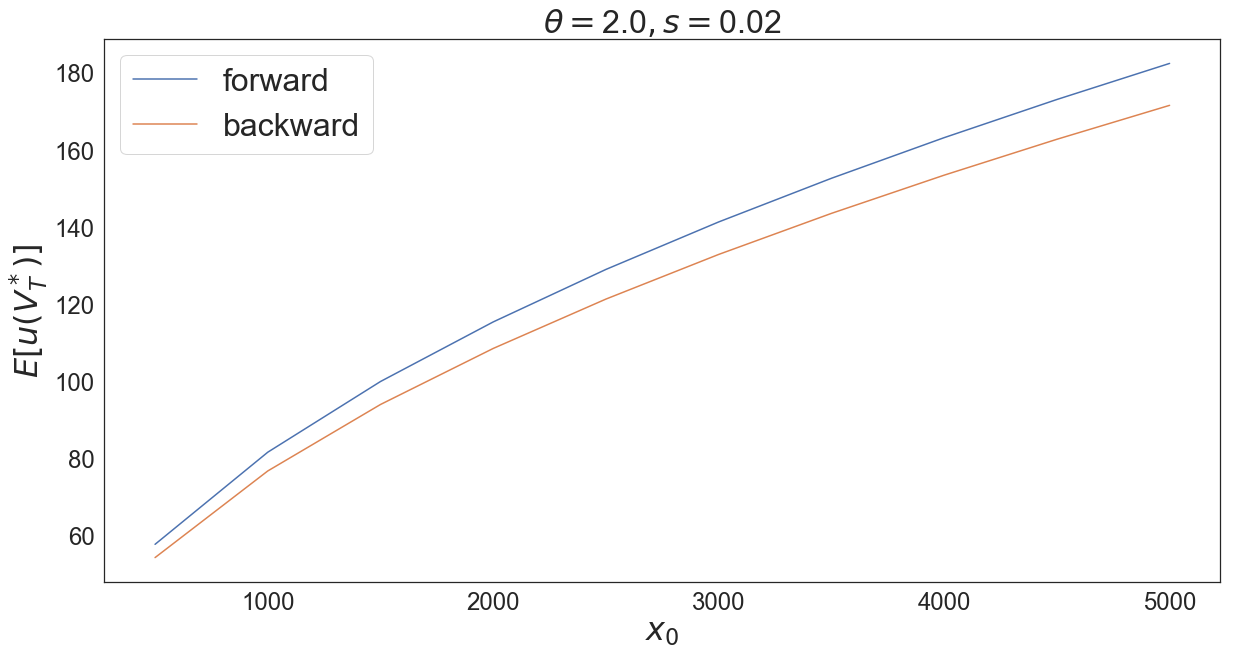

In [51]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

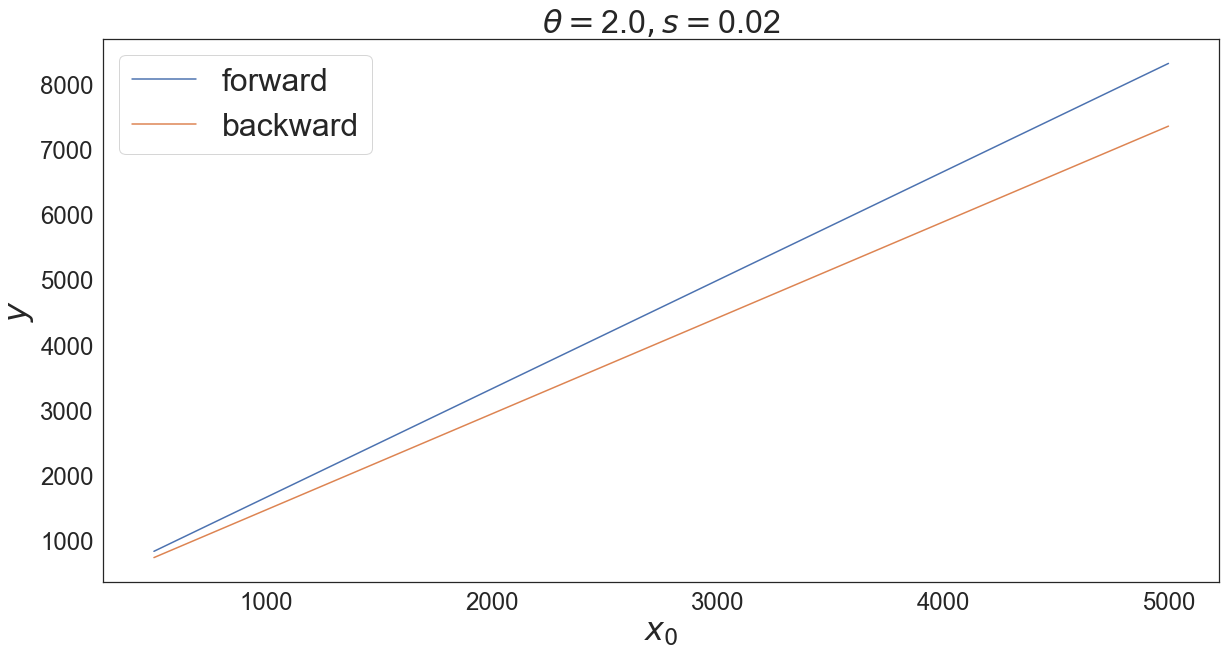

In [52]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [53]:
seed = 12345
N = 10
theta = 3.0
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.02

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

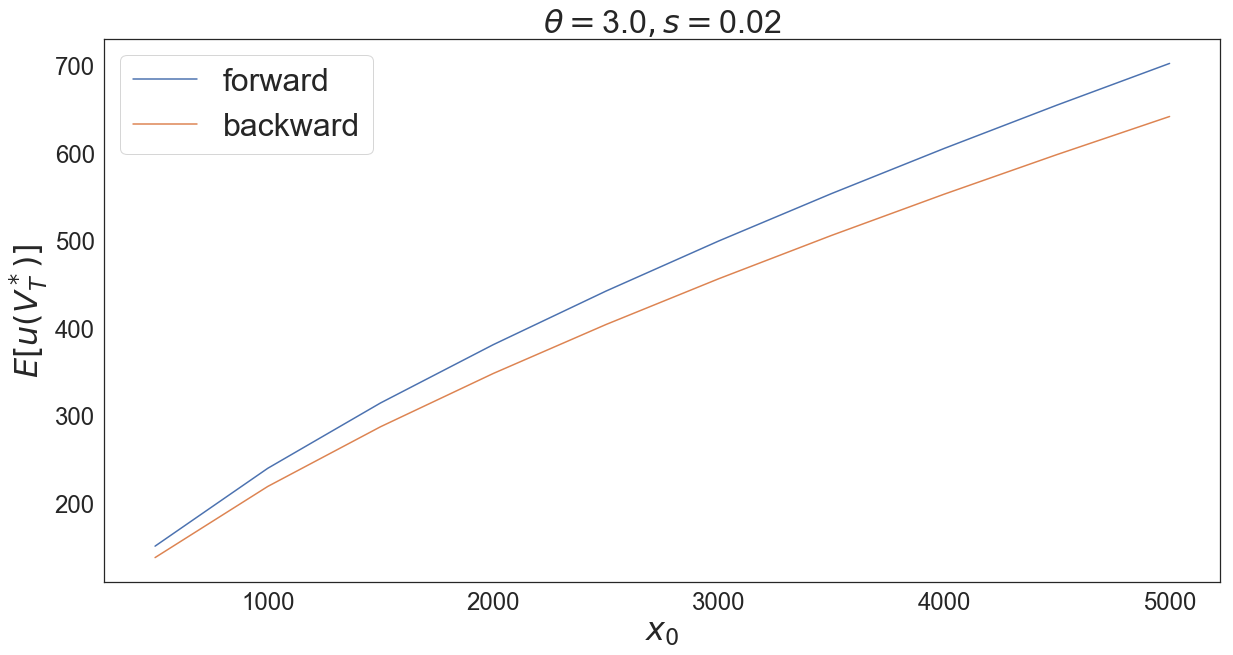

In [54]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

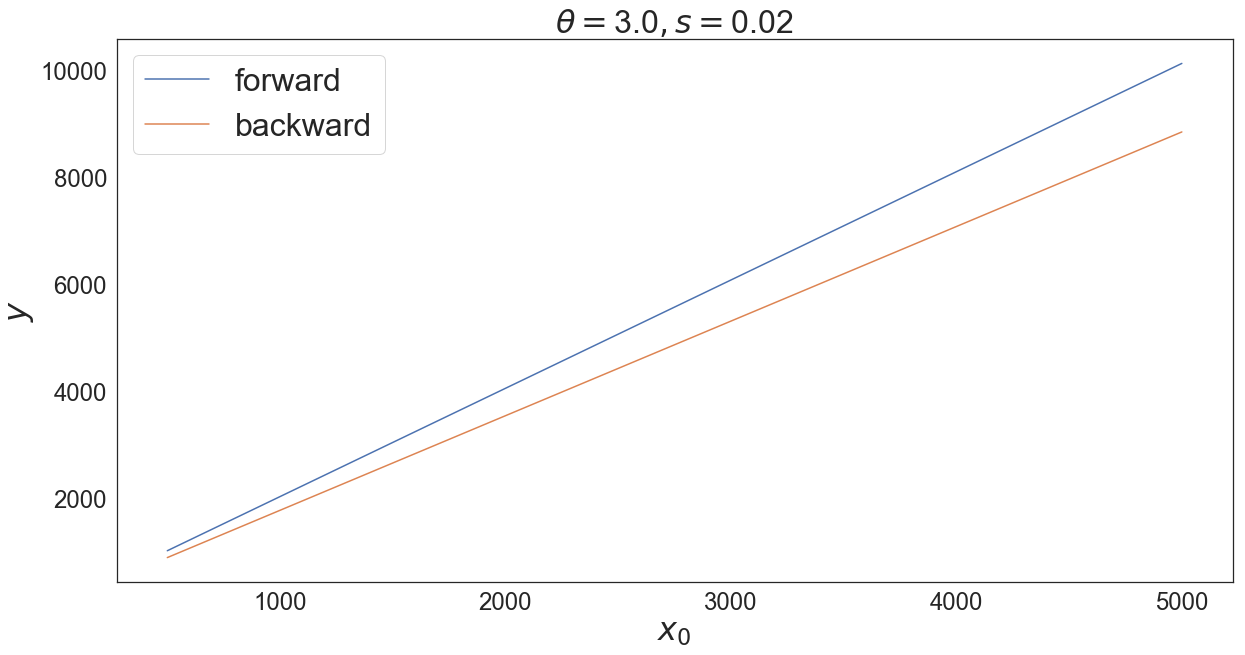

In [55]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

### $\mu$を変化させてみる

In [134]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

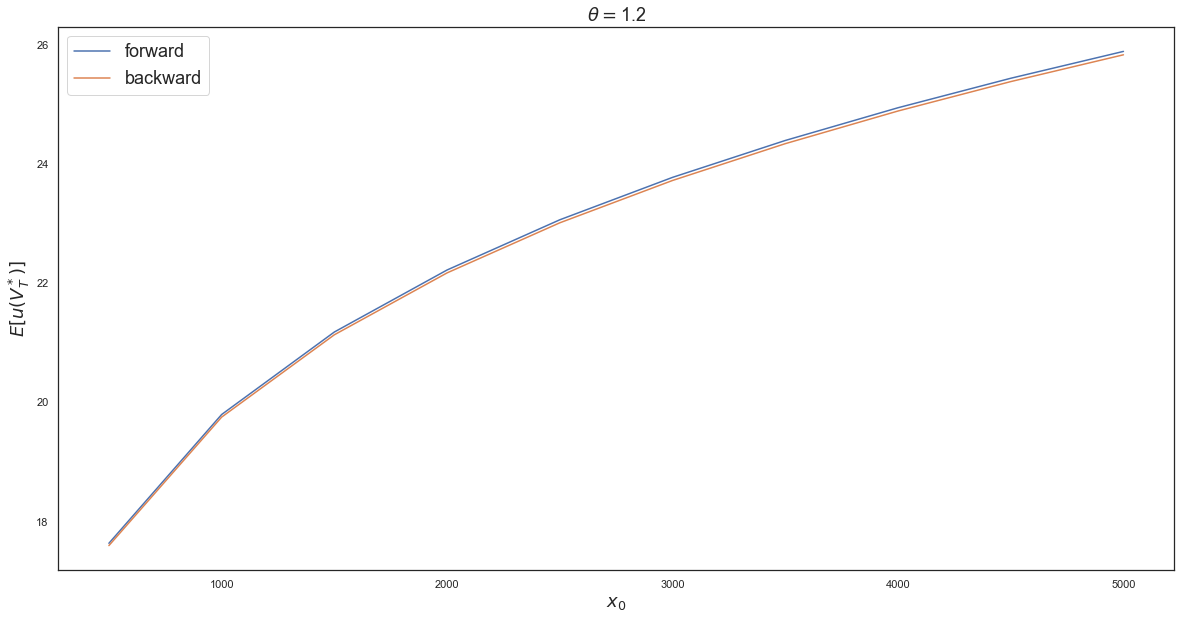

In [135]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

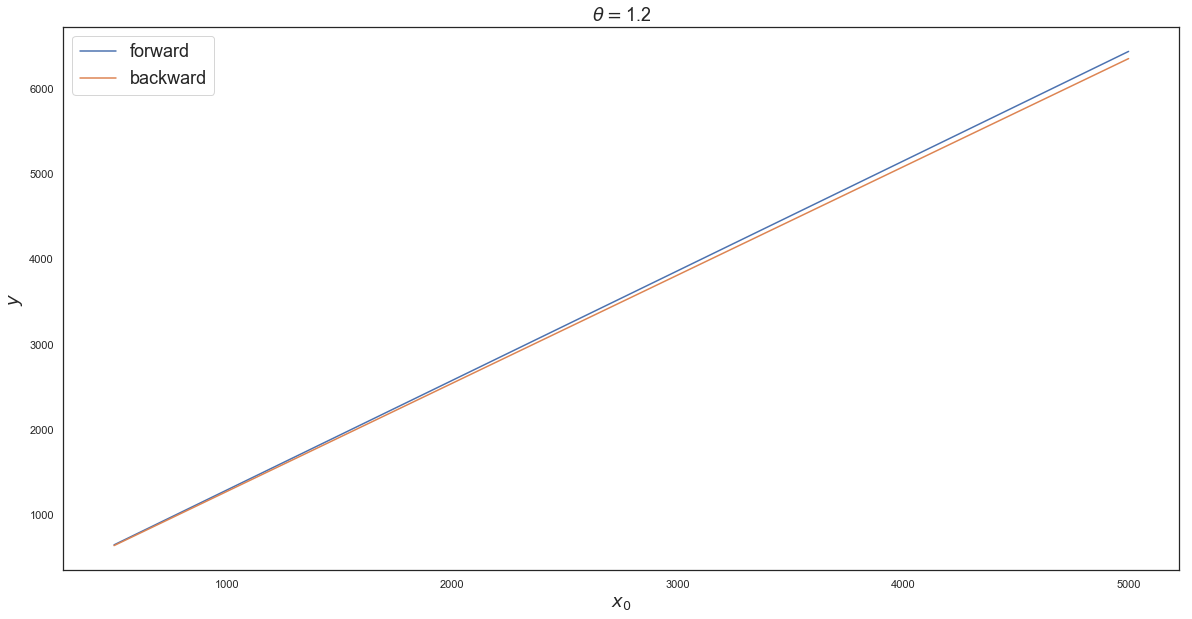

In [137]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [131]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0.01
sigma = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

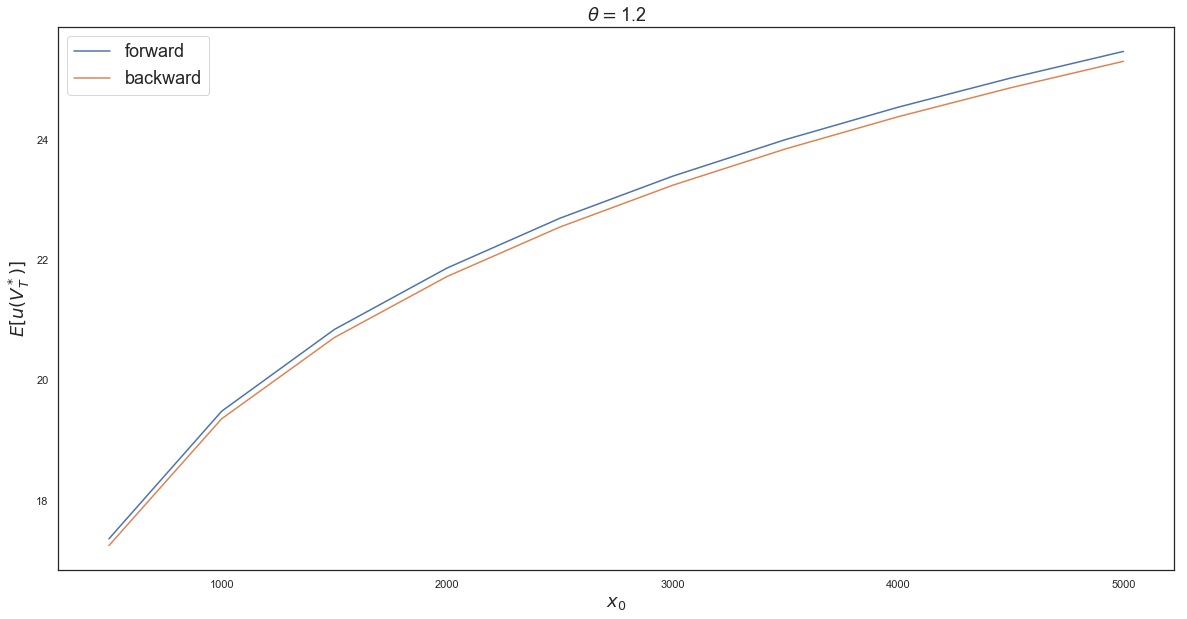

In [132]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

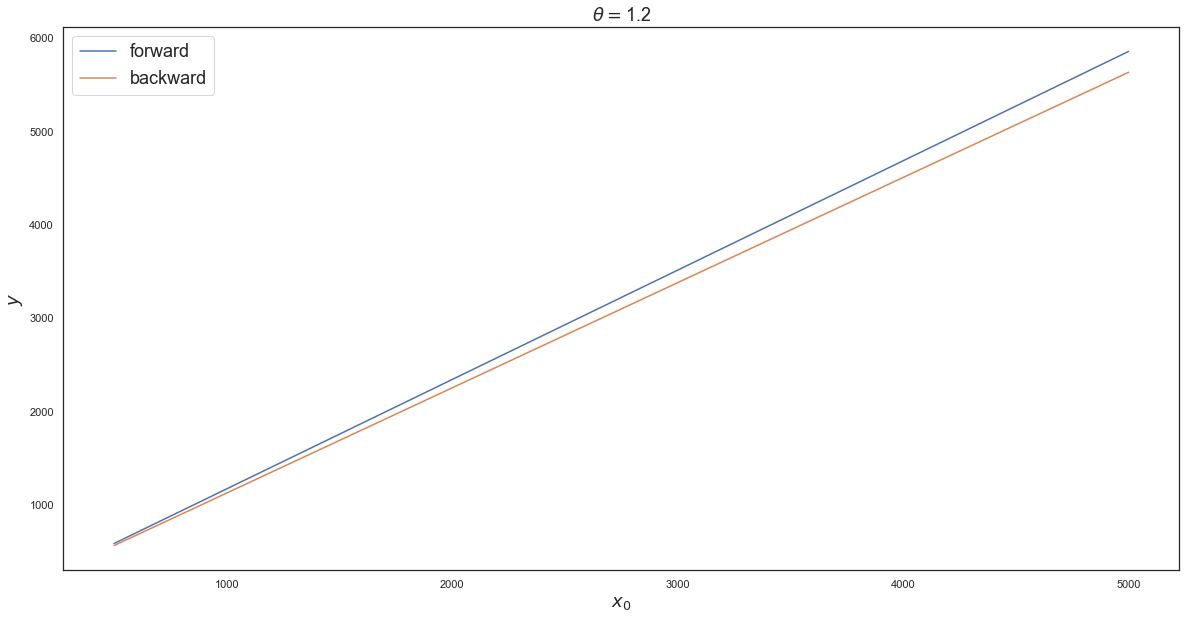

In [133]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import backward as bk
import forward as fw
import math

In [101]:
def backward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right):
    pi = ((((p*(u-1))/((1-p)*(1-d)))**theta)-1)/((u - 1)+(((p*(u-1))/((1-p)*(1-d)))**theta)*(1 - d))
    up_times = bk.up_times(N)
    down_times = bk.down_times(N)
    prm_theta = bk.prm_theta(N, theta)
    
    up_r = bk.up_r(N, u)
    #up_r_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, bk.uniform_rand(N, seed, eps_left, eps_right)))

    
    down_r = bk.down_r(N, d)
    #down_r_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, bk.uniform_rand(N, seed, eps_left, eps_right)))
    
    prob = bk.prob(N, p)
    prob_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), prob, bk.uniform_rand(N, seed, eps_left, eps_right)))
    
    prm_M = bk.prm_M(N, pi, prm_theta, up_r_uniform_rand, down_r_uniform_rand, prob_uniform_rand)
    value = bk.value(N, pi, default_value, up_r_uniform_rand, down_r_uniform_rand)
    wealth = bk.wealth(N, prm_theta, prm_M, value)
    utility = bk.utility(N, prm_theta, value)
    exp_utility = bk.exp_utility(N, up_times, down_times, prob_uniform_rand, utility)
    Wn = bk.Wn(N, up_times, down_times, prob, wealth)
    
    df_backward = pd.DataFrame([up_times, down_times, prm_theta, up_r, down_r, prob_uniform_rand, prm_M, value, wealth, utility, exp_utility, Wn]).T
    df_backward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_M', 'value', 'wealth', 'utility', 'exp_utility', 'Wn']
    
    return df_backward#df_backward['exp_utility'][N], df_backward['wealth'][0] 

In [102]:
def backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma):
    pi = ((((p*(u-1))/((1-p)*(1-d)))**theta)-1)/((u - 1)+(((p*(u-1))/((1-p)*(1-d)))**theta)*(1 - d))
    up_times = bk.up_times(N)
    down_times = bk.down_times(N)
    prm_theta = bk.prm_theta(N, theta)
    
    up_r = bk.up_r(N, u)
    #up_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, bk.norm_rand(N, seed, mu, sigma)))
    
    down_r = bk.down_r(N, d)
    #down_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, bk.norm_rand(N, seed, mu, sigma)))
    
    prob = bk.prob(N, p)
    prob_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), prob, bk.norm_rand(N, seed, mu, sigma)))
    
    prm_M = bk.prm_M(N, pi, prm_theta, up_r, down_r, prob_norm_rand)
    value = bk.value(N, pi, default_value, up_r, down_r)
    wealth = bk.wealth(N, prm_theta, prm_M, value)
    utility = bk.utility(N, prm_theta, value)
    exp_utility = bk.exp_utility(N, up_times, down_times, prob_norm_rand, utility)
    Wn = bk.Wn(N, up_times, down_times, prob_norm_rand, wealth)
    
    df_backward = pd.DataFrame([up_times, down_times, prm_theta, up_r, down_r, prob_norm_rand, prm_M, value, wealth, utility, exp_utility, Wn]).T
    df_backward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_M', 'value', 'wealth', 'utility', 'exp_utility', 'Wn']
    
    return df_backward#df_backward['exp_utility'][N], df_backward['wealth'][0] 

In [103]:
def forward_uniform_rand(N, theta, u, d, p, default_value, eps_left, eps_right):
    up_times = fw.up_times(N)
    down_times = fw.down_times(N)
    prm_theta = fw.prm_theta(N, theta)
    
    up_r = fw.up_r(N, u)
    #up_r_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, fw.uniform_rand(N, seed, eps_left, eps_right)))
    
    down_r = fw.down_r(N, d)
    #down_r_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, fw.uniform_rand(N, seed, eps_left, eps_right)))
    
    prob = fw.prob(N, p)
    prob_uniform_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), prob, fw.uniform_rand(N, seed, eps_left, eps_right)))
    
    prm_q = fw.prm_q(N, up_r, down_r)
    prm_a = fw.prm_a(N, prob_uniform_rand, prm_q)
    prm_b = fw.prm_b(N, prm_q)
    prm_c = fw.prm_c(N, prob_uniform_rand, prm_q)
    delta = fw.delta(N, prm_theta, prm_a, prm_b, prm_c)
    pi = fw.pi(N, prm_theta, up_r, prob_uniform_rand, prm_q, delta)
    value = fw.value(N, default_value, up_r, down_r, pi)
    U0 = fw.U0(N, prm_theta, value)
    I0 = fw.I0(N, prm_theta, value)
    I1 = fw.I1(N, delta, I0)
    U1 = fw.U1(N, prm_theta, delta, U0)
    exp_U1 = fw.exp_U1(N, up_times, down_times, prob_uniform_rand, U1)
    
    df_forward = pd.DataFrame([up_times, down_times, prm_theta, up_r, down, prob_uniform_rand, prm_q, prm_a, prm_b, prm_c, delta, pi, value, U0, I0, I1, U1, exp_U1]).T
    df_forward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_q', 'prm_a', 'prm_b', 'prm_c', 'delta', 'pi', 'value', 'U0', 'I0', 'I1', 'U1', 'exp_U1']
    
    return df_forward#df_forward["exp_U1"][N]

In [104]:
def forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma):
    up_times = fw.up_times(N)
    down_times = fw.down_times(N)
    prm_theta = fw.prm_theta(N, theta)
    
    up_r = fw.up_r(N, u)
    #up_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), up_r, fw.norm_rand(N, seed, mu, sigma)))
    
    down_r = fw.down_r(N, d)
    #down_r_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), down_r, fw.norm_rand(N, seed, mu, sigma)))
    
    prob = fw.prob(N, p)
    prob_norm_rand = list(map(lambda x,y: list(map(lambda a,b: a+b, x,y)), prob, fw.norm_rand(N, seed, mu, sigma)))
    
    prm_q = fw.prm_q(N, up_r, down_r)
    prm_a = fw.prm_a(N, prob_norm_rand, prm_q)
    prm_b = fw.prm_b(N, prm_q)
    prm_c = fw.prm_c(N, prob_norm_rand, prm_q)
    delta = fw.delta(N, prm_theta, prm_a, prm_b, prm_c)
    pi = fw.pi(N, prm_theta, up_r, prob_norm_rand, prm_q, delta)
    value = fw.value(N, default_value, up_r, down_r, pi)
    U0 = fw.U0(N, prm_theta, value)
    I0 = fw.I0(N, prm_theta, value)
    I1 = fw.I1(N, delta, I0)
    U1 = fw.U1(N, prm_theta, delta, U0)
    exp_U1 = fw.exp_U1(N, up_times, down_times, prob_norm_rand, U1)
    
    df_forward = pd.DataFrame([up_times, down_times, prm_theta, up_r, down_r, prob_norm_rand, prm_q, prm_a, prm_b, prm_c, delta, pi, value, U0, I0, I1, U1, exp_U1]).T
    df_forward.columns = ['up_times', 'down_times', 'prm_theta', 'up_r', 'down_r', 'prob', 'prm_q', 'prm_a', 'prm_b', 'prm_c', 'delta', 'pi', 'value', 'U0', 'I0', 'I1', 'U1', 'exp_U1']
    
    return df_forward#df_forward["exp_U1"][N]

In [105]:
def default_plot_uniform(N, theta, u, d, p, default_value, eps_left, eps_right):
    default_arr = []
    
    for i in range(1, 11):
        default_arr.append(500*i)
        forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: sum(forward_uniform_rand(N, theta, u, d, p, x, eps_left, eps_right)["exp_U1"][N]), default_arr))]

    fw = pd.DataFrame(forward_type).T
    fw.columns = ["default", "Exp_u1"]

    fw_x = fw["default"]
    fw_y = fw["Exp_u1"]

    for i in range(1, 11):
        backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: sum(backward_uniform_rand(N, theta, u, d, p, x, eps_left, eps_right)["exp_utility"][N]), default_arr))]

    bk = pd.DataFrame(backward_type).T
    bk.columns = ["default", "Exp_u1"]

    bk_x = bk["default"]
    bk_y = bk["Exp_u1"]
    
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(20,10))
    plt.plot(fw_x, fw_y, label = "forward")
    plt.plot(bk_x, bk_y, label = "backward")

    plt.title(r"$\theta =$" +str(theta), fontsize=18)
    plt.xlabel(r"$x_0$", fontsize=18)
    plt.ylabel(r"$E[u(V_T^*)]$", fontsize=18)

    plt.legend(fontsize=18)
    return plt.show()

In [106]:
def default_plot_normal(N, theta, u, d, p, default_value, mu, sigma):
    default_arr = []
    
    for i in range(1, 11):
        default_arr.append(500*i)
        forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: sum(forward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_U1"][N]), default_arr))]

    fw = pd.DataFrame(forward_type).T
    fw.columns = ["default", "Exp_u1"]

    fw_x = fw["default"]
    fw_y = fw["Exp_u1"]

    for i in range(1, 11):
        backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: sum(backward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_utility"][N]), default_arr))]

    bk = pd.DataFrame(backward_type).T
    bk.columns = ["default", "Exp_u1"]

    bk_x = bk["default"]
    bk_y = bk["Exp_u1"]
    
    sns.set()
    sns.set_style('white')
    plt.figure(figsize=(20,10))
    plt.plot(fw_x, fw_y, label = "forward")
    plt.plot(bk_x, bk_y, label = "backward")

    plt.title(r"$\theta =$" +str(theta), fontsize=18)
    plt.xlabel(r"$x_0$", fontsize=18)
    plt.ylabel(r"$E[u(V_T^*)]$", fontsize=18)

    plt.legend(fontsize=18)
    return plt.show()

In [107]:
def default_plot_y_uniform(N, theta, u, d, p, default_value, eps_left, eps_right):
    default_arr = []

    for i in range(1, 11):
        default_arr.append(500*i)
        forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: math.pow(sum(forward_uniform_rand(N, theta, u, d, p, x, eps_left, eps_right)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))), default_arr))]

    fw = pd.DataFrame(forward_type).T
    fw.columns = ["default", "Exp_u1"]

    fw_x = fw["default"]
    fw_y = fw["Exp_u1"]

    for i in range(1, 11):
        backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: math.pow(sum(backward_uniform_rand(N, theta, u, d, p, x, eps_left, eps_right)["exp_utility"][N])*(1-1/theta), 1/(1-(1/theta))), default_arr))]

    bk = pd.DataFrame(backward_type).T
    bk.columns = ["default", "Exp_u1"]

    bk_x = bk["default"]
    bk_y = bk["Exp_u1"]

    plt.figure(figsize=(20,10))
    plt.plot(fw_x, fw_y, label = "forward")
    plt.plot(bk_x, bk_y, label = "backward")

    plt.title(r"$\theta =$" +str(theta), fontsize=18)
    plt.xlabel(r"$x_0$", fontsize=18)
    plt.ylabel(r"$y$", fontsize=18)
    plt.legend(fontsize=18)
    return plt.show()

In [108]:
def default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma):
    default_arr = []

    for i in range(1, 11):
        default_arr.append(500*i)
        forward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: math.pow(sum(forward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))), default_arr))]

    fw = pd.DataFrame(forward_type).T
    fw.columns = ["default", "Exp_u1"]

    fw_x = fw["default"]
    fw_y = fw["Exp_u1"]

    for i in range(1, 11):
        backward_type = [list(map(lambda x: x, default_arr)), list(map(lambda x: math.pow(sum(backward_normal_rand(N, theta, u, d, p, x, mu, sigma)["exp_utility"][N])*(1-1/theta), 1/(1-(1/theta))), default_arr))]

    bk = pd.DataFrame(backward_type).T
    bk.columns = ["default", "Exp_u1"]

    bk_x = bk["default"]
    bk_y = bk["Exp_u1"]

    plt.figure(figsize=(20,10))
    plt.plot(fw_x, fw_y, label = "forward")
    plt.plot(bk_x, bk_y, label = "backward")

    plt.title(r"$\theta =$" +str(theta), fontsize=18)
    plt.xlabel(r"$x_0$", fontsize=18)
    plt.ylabel(r"$y$", fontsize=18)
    plt.legend(fontsize=18)
    return plt.show()

### 正規乱数（$\mu=0$で$\sigma$をいろいろ変えてやってみる）

In [35]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

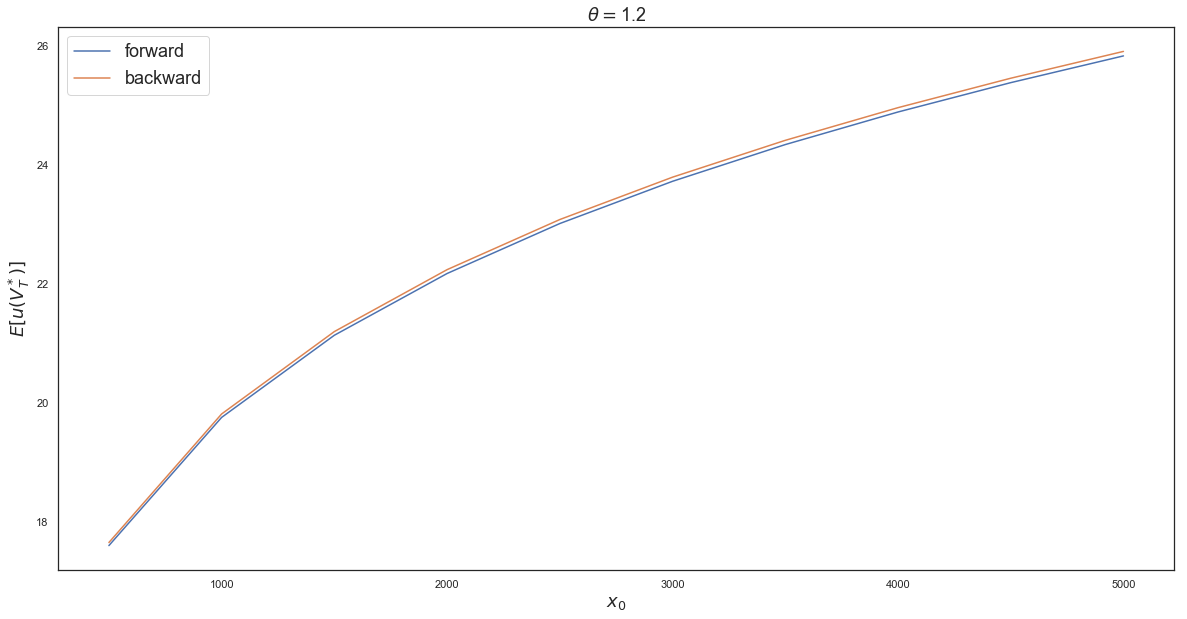

In [33]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

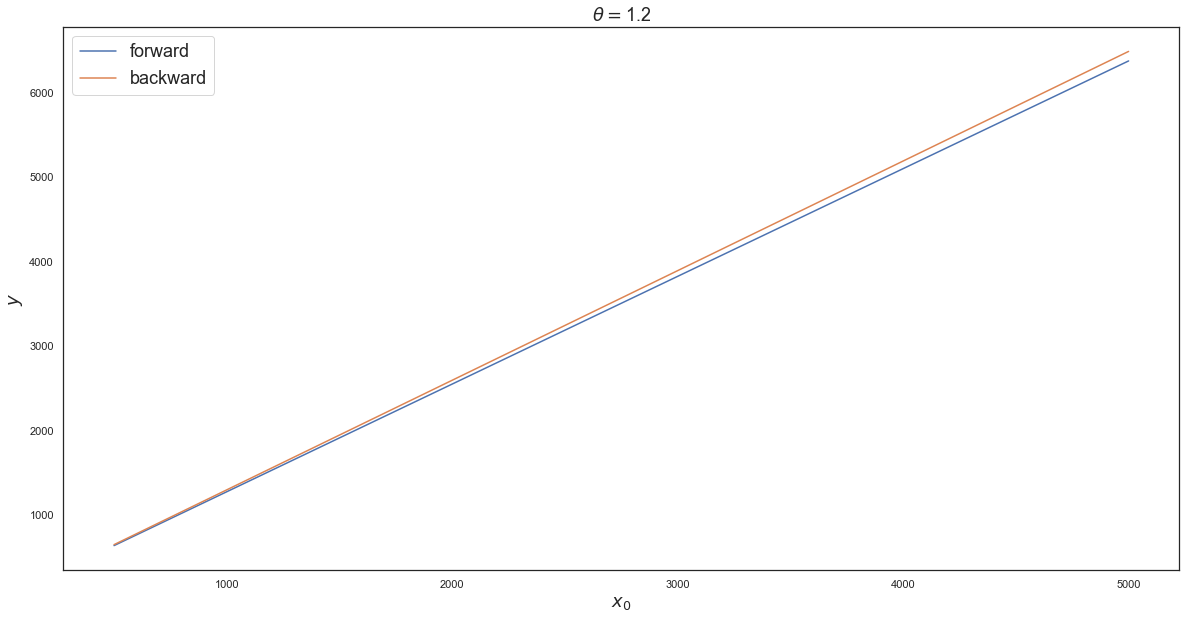

In [34]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [54]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.02

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

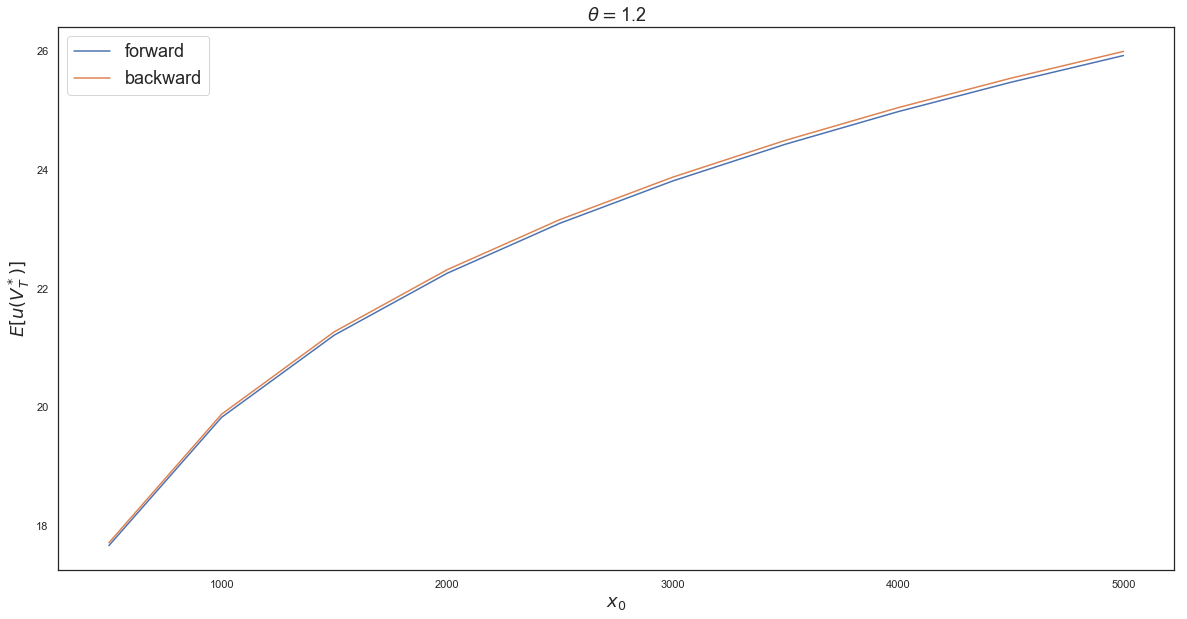

In [55]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

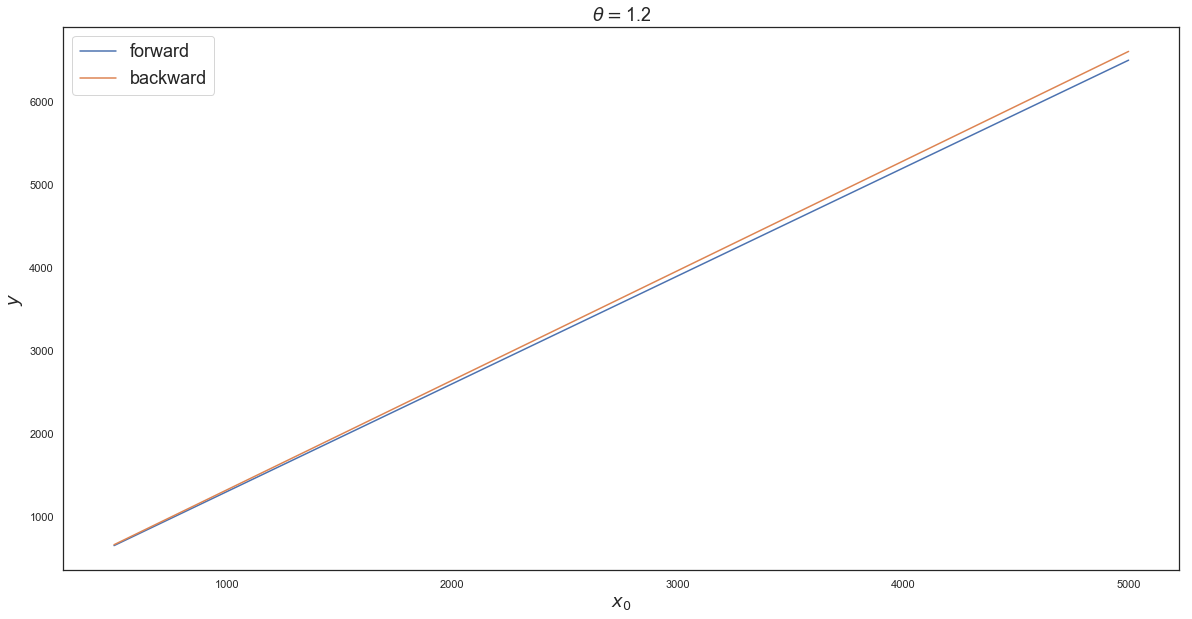

In [56]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [109]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.03

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

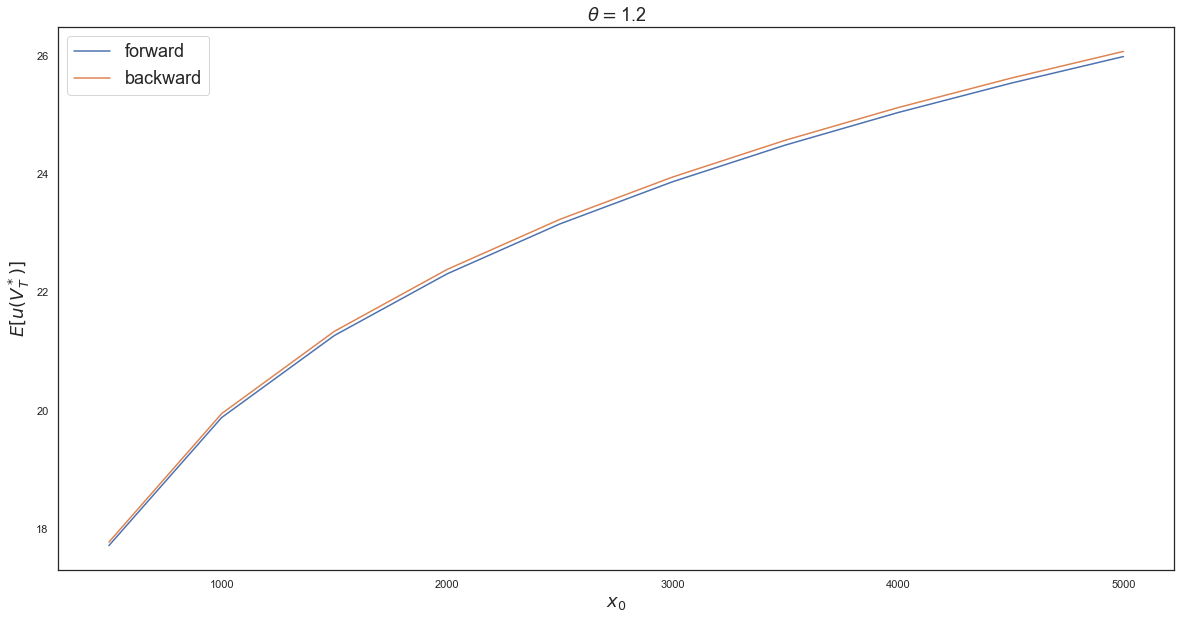

In [110]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

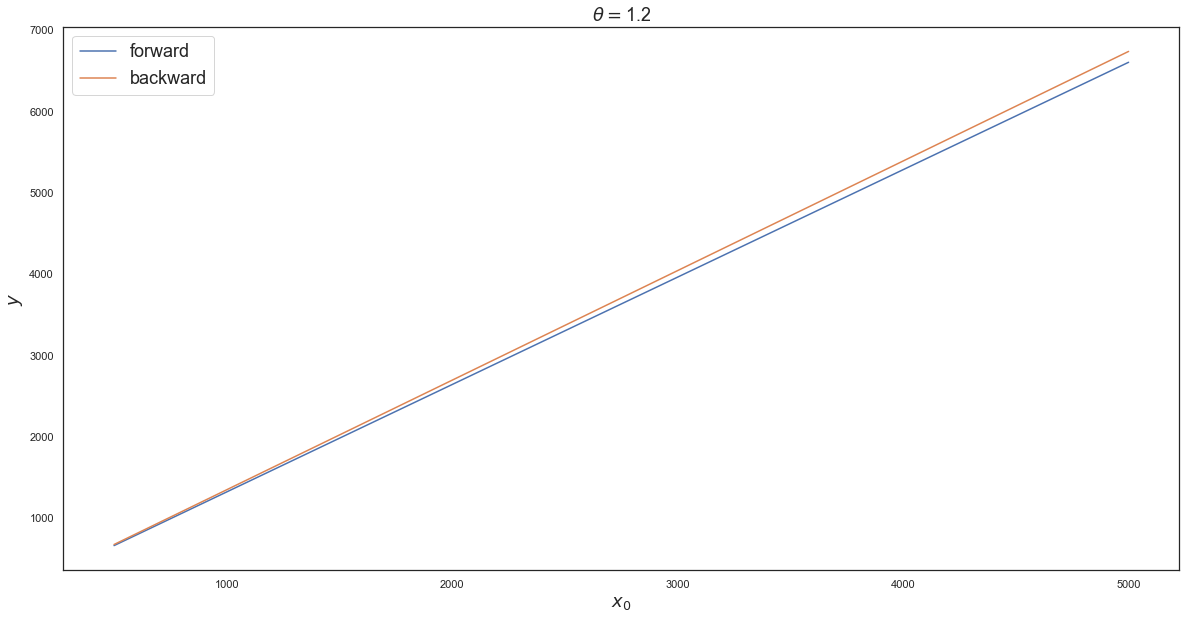

In [111]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [112]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.05

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

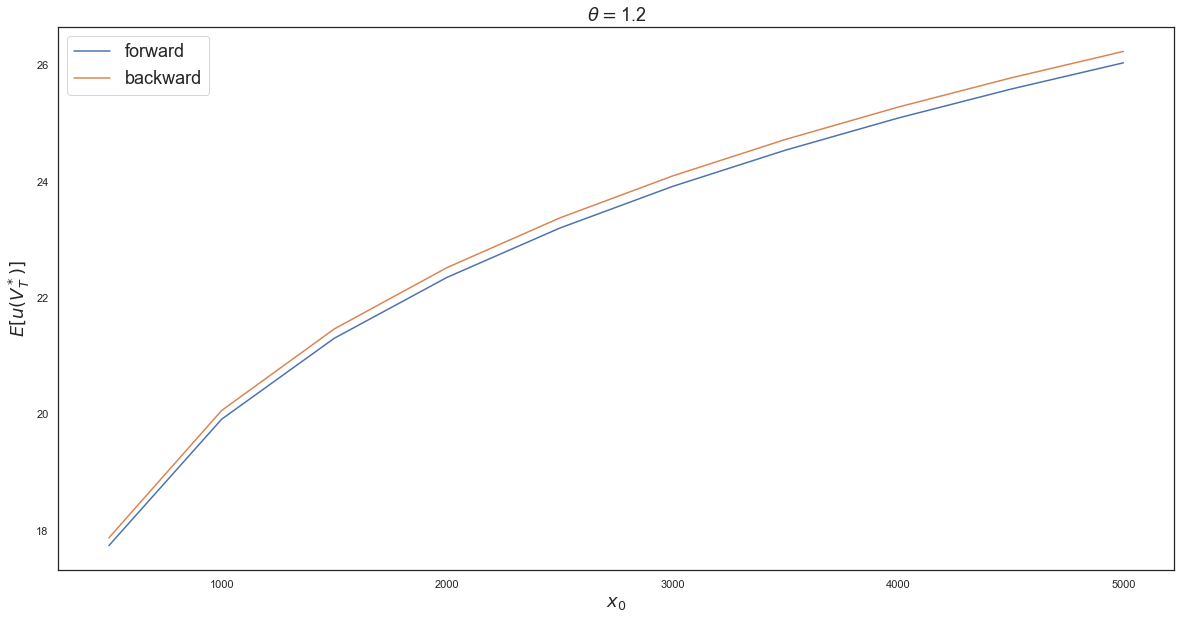

In [113]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

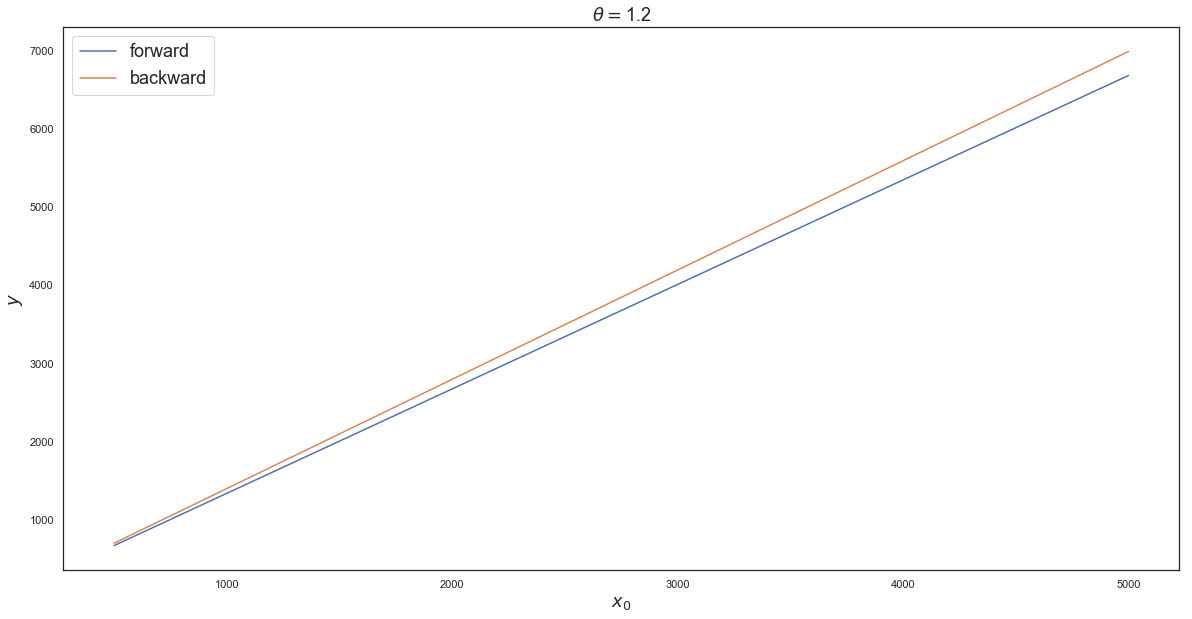

In [114]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [11]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.01

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

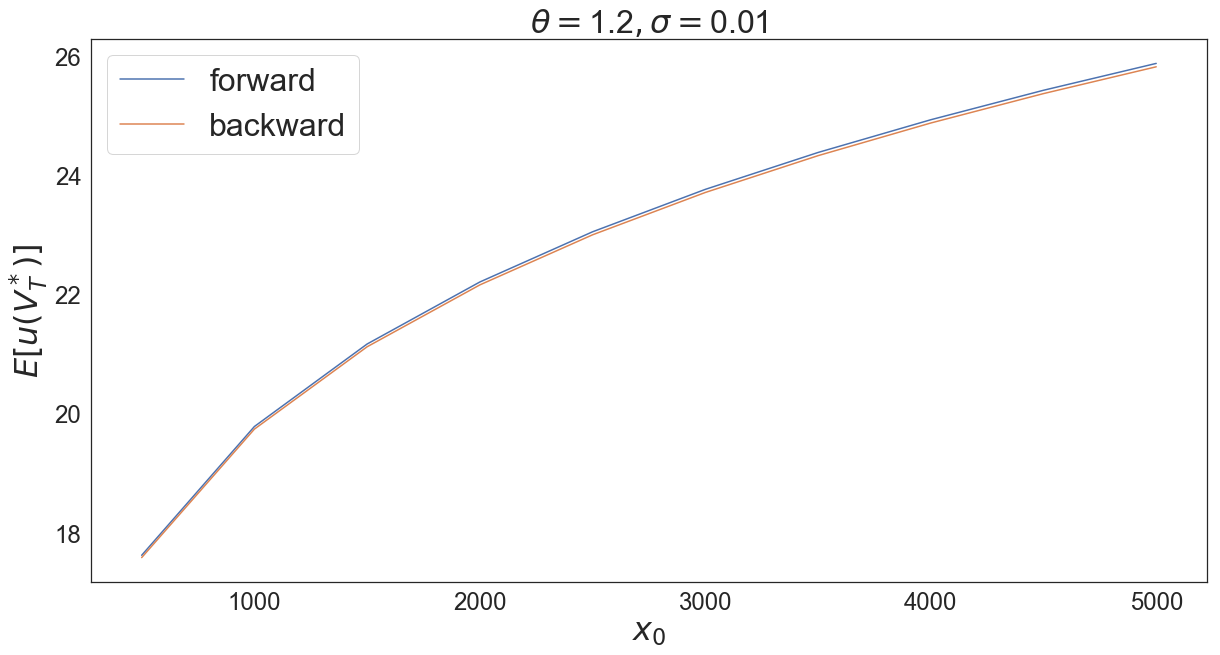

In [12]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

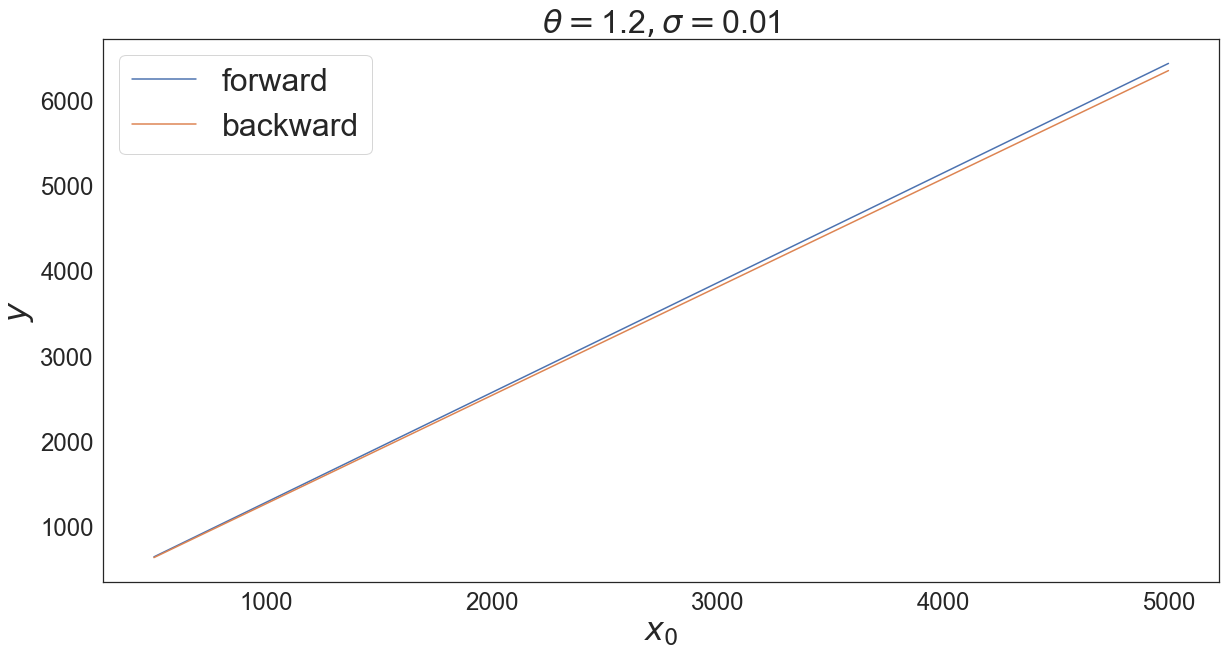

In [13]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [56]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.005

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

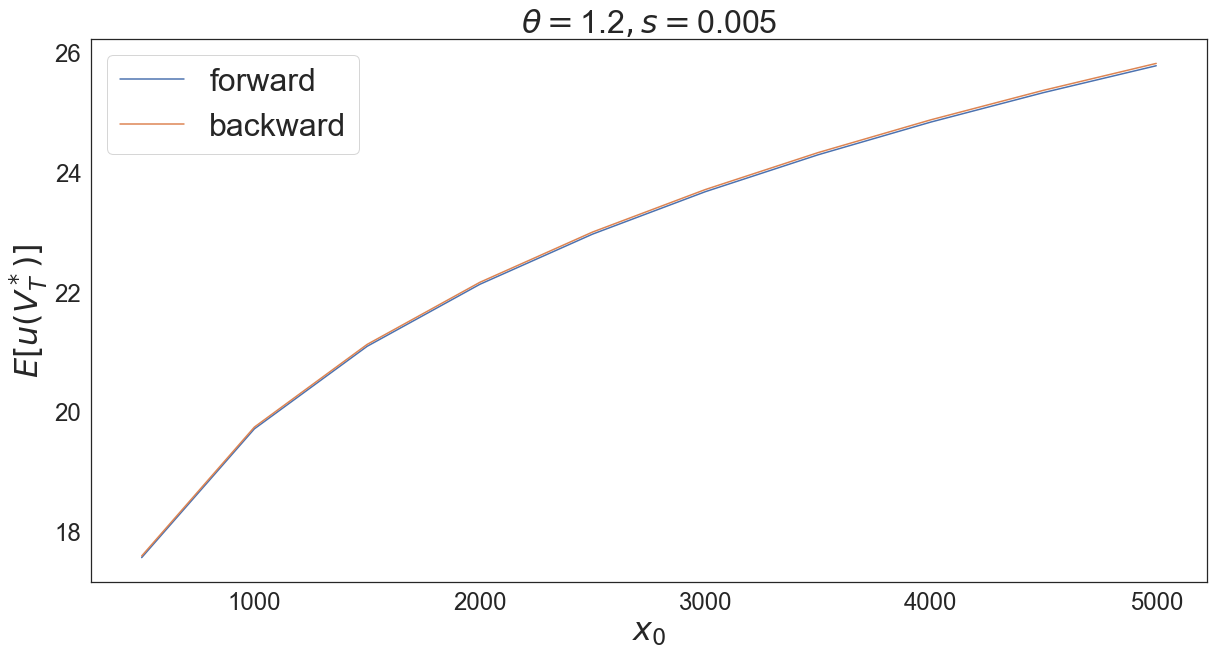

In [57]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

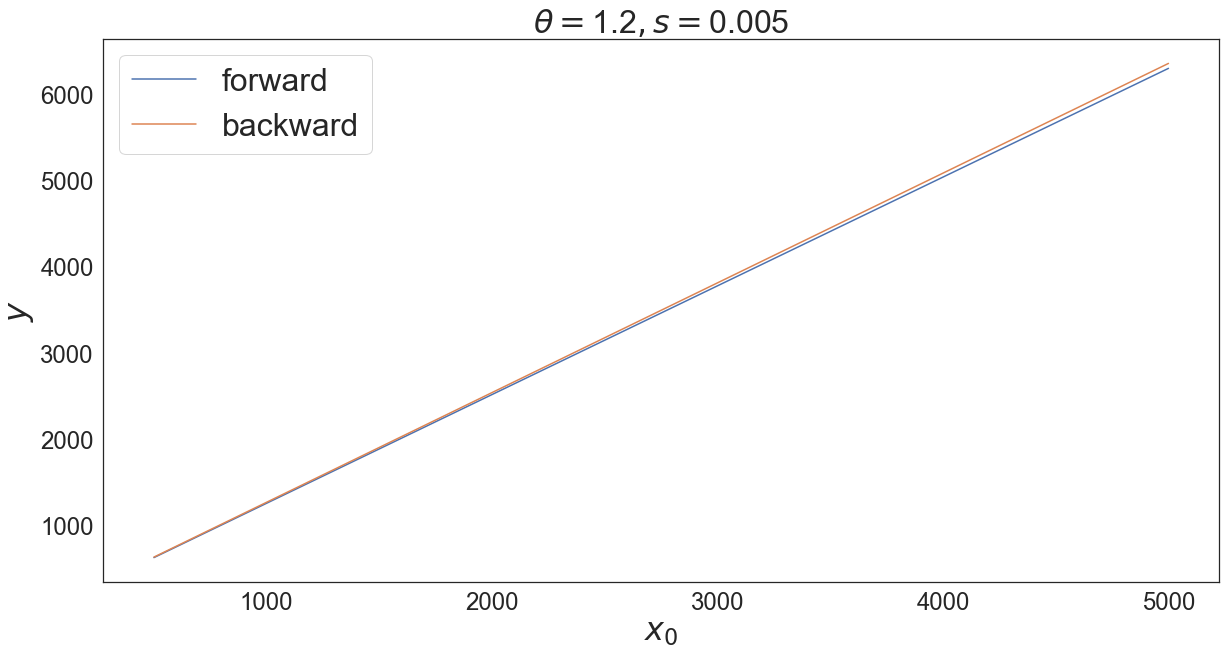

In [58]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)

In [59]:
seed = 12345
N = 10
theta = 1.2
u = 1.2
d = 0.8
p = 0.4
default_value = 500
mu = 0
sigma = 0.0075

 ### ($N=${{N}}, $\theta=${{theta}}, $u=${{u}}, $d=${{d}}, $p=${{p}}, 初期資産={{default_value}}, $\mu=${{mu}}, $\sigma=${{sigma}})<br>

### Backward 
<br>
$E[u(V_T^*)]$ = {{str(sum(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_utility"][N]))}} <br>
$w_0(x)$ = {{str(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0])}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(backward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["wealth"][0][0]*(1-1/theta), 1/(1-(1/theta))))}}

### Forward
<br>
$E[u(V_T^*)]$ = {{str(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N]))}} <br>
初期資産 :  {{str(default_value)}} $\rightarrow${{str(math.pow(sum(forward_normal_rand(N, theta, u, d, p, default_value, mu, sigma)["exp_U1"][N])*(1-1/theta), 1/(1-(1/theta))))}}

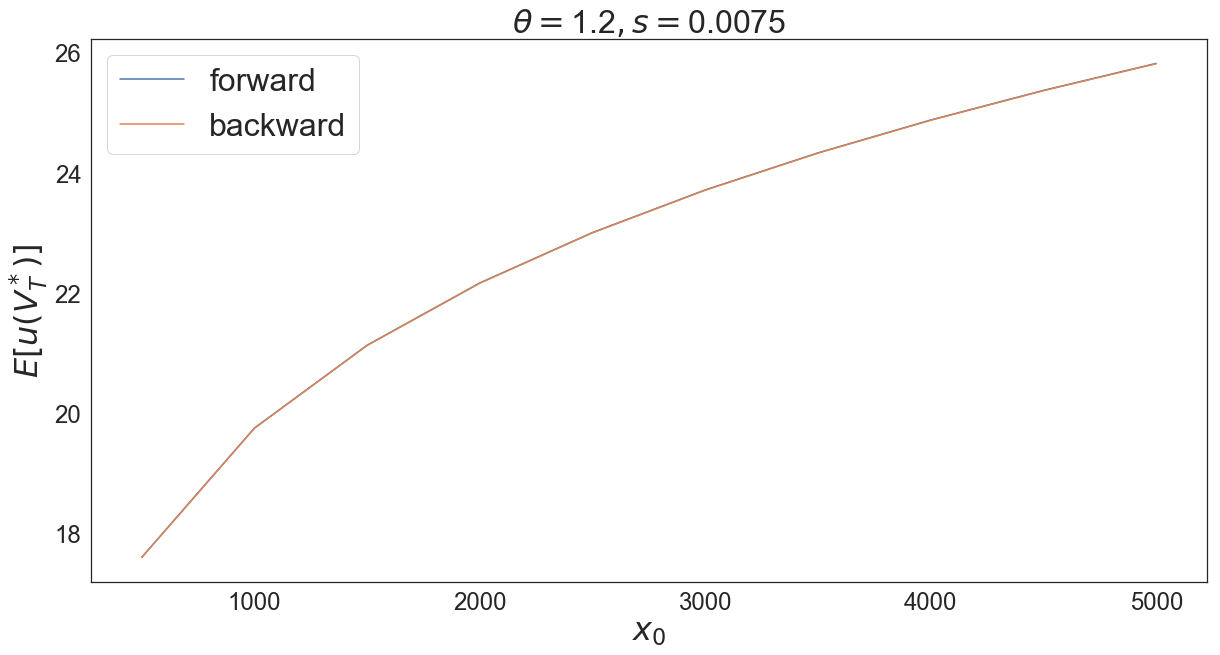

In [60]:
default_plot_normal(N, theta, u, d, p, default_value, mu, sigma)

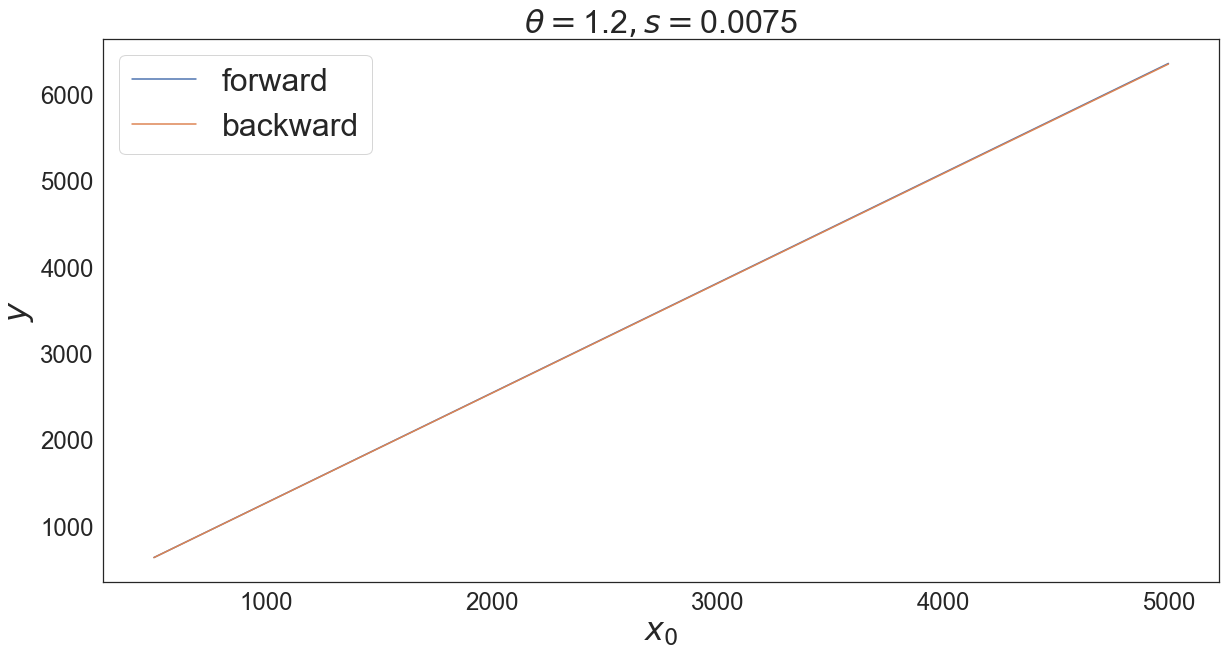

In [61]:
default_plot_y_normal(N, theta, u, d, p, default_value, mu, sigma)